In [382]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [383]:
# Lets not missout any rows or columns in the process of analysis
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [384]:
# Load data for application data and have a initial glimpse of it
df_application_data = pd.read_csv('application_data.csv')
df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

##### Check all the columns before proceeding with data cleaning

In [385]:
df_application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

It is very much evident that AMT_INCOME_TOTAL has outlier
 - confirm with boxplot

<Axes: xlabel='AMT_INCOME_TOTAL'>

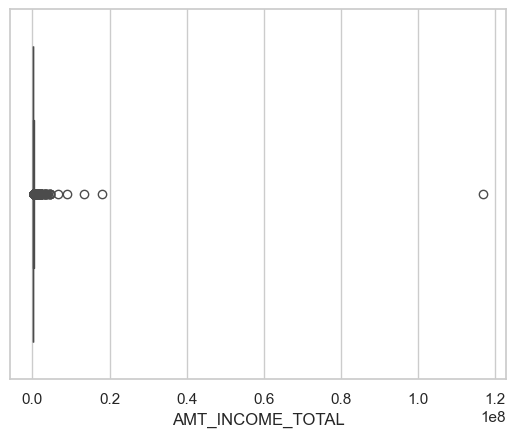

In [386]:
sns.boxplot(df_application_data.AMT_INCOME_TOTAL,orient='h')

#### AMT_INCOME_TOTAL is highly skewed
 - we can floor the data to a certain extent
   </br> OR
 - We can create a categorical column out of it such that we could extract the necessary information without compromising any data

In [387]:
def salary_segmentation(x):
    if x<=50000:
        return 'VL'
    elif x>=50001 and x <= 100000:
        return 'L'
    elif x>=100001 and x <= 200000: 
        return 'M'
    elif x>=200001 and x <= 300000: 
        return 'MH'
    elif x>=300001 and x <= 500000: 
        return 'H'
    elif x>=500001 and x <= 1000000: 
        return 'VH'
    else:
        return 'UR'

In [388]:
df_application_data['SALARY_RANGE'] =  df_application_data.AMT_INCOME_TOTAL.apply(salary_segmentation)

In [389]:
df_application_data.SALARY_RANGE.head()

0    MH
1    MH
2     L
3     M
4     M
Name: SALARY_RANGE, dtype: object

In [390]:
df_application_data.SALARY_RANGE.tail()

307506    M
307507    L
307508    M
307509    M
307510    M
Name: SALARY_RANGE, dtype: object

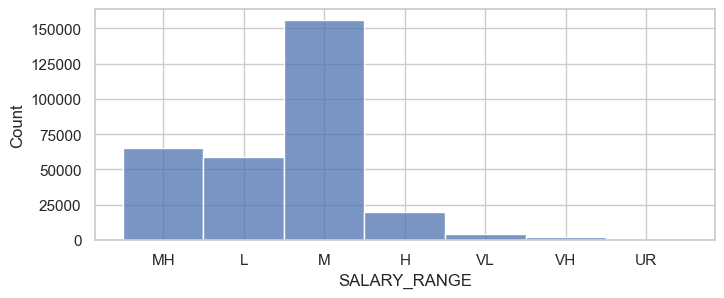

In [391]:
#check for salary distribution
plt.figure(figsize=(8,3))
sns.histplot(df_application_data.SALARY_RANGE)
plt.show()

In [392]:
df_application_data.SALARY_RANGE.value_counts()

SALARY_RANGE
M     155898
MH     65176
L      59181
H      20037
VL      4517
VH      2452
UR       250
Name: count, dtype: int64

<Axes: xlabel='SALARY_RANGE'>

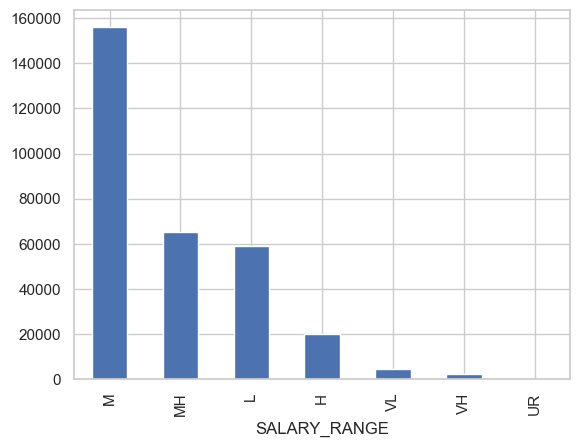

In [393]:
df_application_data.SALARY_RANGE.value_counts().plot(kind='bar')

*** Analysis : - 
     Salary distribution now make more sense as Medium salary range has the highest density

#### Cleaning unnecessary columns

In [394]:
# Check all the available columns
df_application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'SALARY_RANGE'],
      dtype='object', length=123)

In [395]:
# Checking the available number of columns
df_application_data.shape

(307511, 123)

In [396]:
# First step to drop irrelevant columns
application_data_cols_irrelevant_1 = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','OBS_60_CNT_SOCIAL_CIRCLE','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
application_data_cols_irrelevant_1

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [397]:
# Dropping the unnecessary columns
df_application_data.drop(application_data_cols_irrelevant_1,inplace = True, axis=1)

In [398]:
# Checking the shapa after dropping the columns
df_application_data.shape

(307511, 104)

#### There are other uncessary columns are also present such as the Flag_Documents# 
 Dropping those columns as well

In [399]:
application_data_cols_irrelevant_2 = []

for column in df_application_data.columns:
    if "flag_document" in column.lower():
        application_data_cols_irrelevant_2.append(column)
application_data_cols_irrelevant_2

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [400]:
# Dropping the unnecessary columns
df_application_data.drop(application_data_cols_irrelevant_2,inplace = True, axis=1)

In [401]:
# checking the shape after dropping the flag_document columns
df_application_data.shape

(307511, 84)

In [402]:
# Types of column attached to the data frame
df_application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
REG_REGION_NOT_LIVE_REGION        int64


In [408]:
#percantage of null data in all the columns
100*df_application_data.isnull().mean().sort_values(ascending=False)

COMMONAREA_AVG                  69.872297
COMMONAREA_MEDI                 69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

In [409]:
# I am taking 40% cut off of having null data in a particular columns
cut_off=40
cols_to_drop = list(df_application_data.columns[100*df_application_data.isnull().mean()>cut_off])
print(cols_to_drop)
print('No. of columns to be dropped',len(cols_to_drop))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [410]:
# dropping the columns having high % of missing data
df_application_data.drop(cols_to_drop,axis=1,inplace=True)

In [411]:
df_application_data.shape

(307511, 35)

In [413]:
# After dropping columns percantage of null data in allhead the columns
100*df_application_data.isnull().mean().sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
ORGANIZATION_TYPE               0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
SK_ID_CURR                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_ID_PUBLISH                 0.000000
TARGET                          0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STAT

###### After removing the high missing value columns we have OCCUPATION_TYPE as highest missing columns
 - Lets validate and check what kind of data it has

In [414]:
# Analyse the OCCUPATION_TYPE data
df_application_data.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [415]:
# Cheking different available data for OCCUPATION_TYPE column
df_application_data.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

##### Now the 2nd column which has high density of missing values EXT_SOURCE_3
- Lets analyze the column

In [416]:
df_application_data.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [417]:
df_application_data.columns

# Though SK_ID_CURR is an id column we can not drop this as it will help us to link the details to previous_application_data

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'SALARY_RANGE'],
      dtype='object')

In [418]:
# Impute all the columns which have missing values
df1_cat_cols=[] # categorical columns
df1_num_cols=[] # numeric columns

for i in df_application_data.columns:
    if df_application_data[i].nunique()>30:
        df1_num_cols.append(i)
    else:
        df1_cat_cols.append(i)
print (df1_num_cols)
print (df1_cat_cols)

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SALARY_RANGE']


Box Plot for  SK_ID_CURR


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


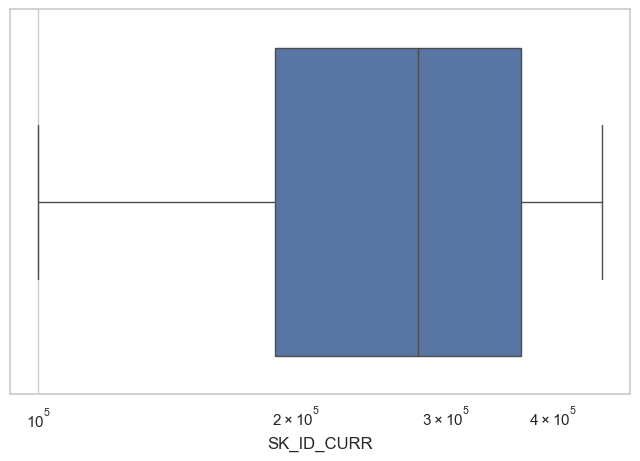


Box Plot for  AMT_INCOME_TOTAL


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


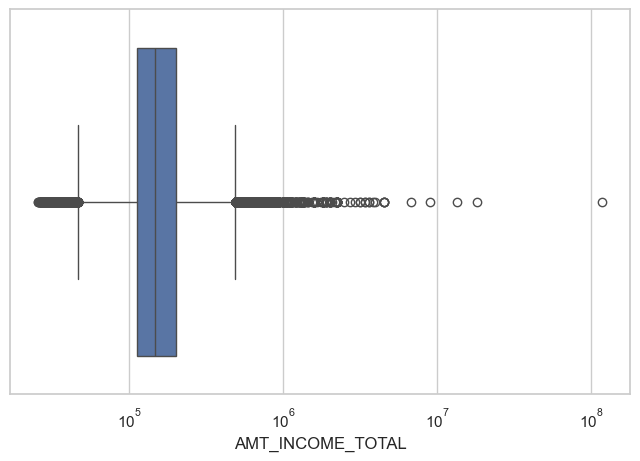


Box Plot for  AMT_CREDIT


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


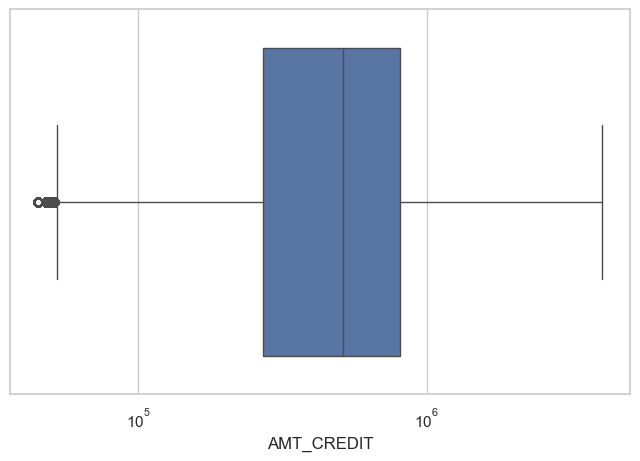


Box Plot for  AMT_ANNUITY


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


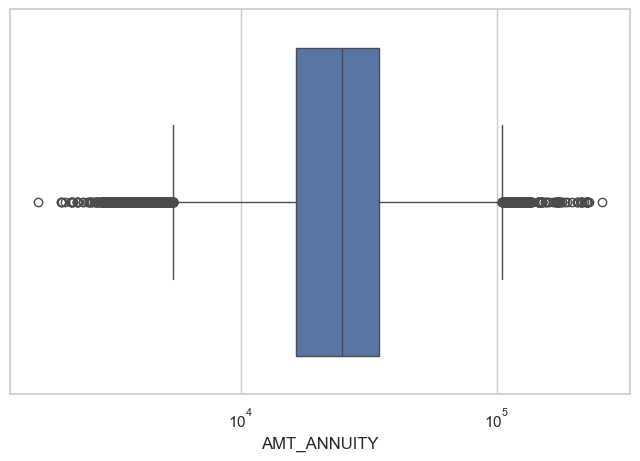


Box Plot for  AMT_GOODS_PRICE


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


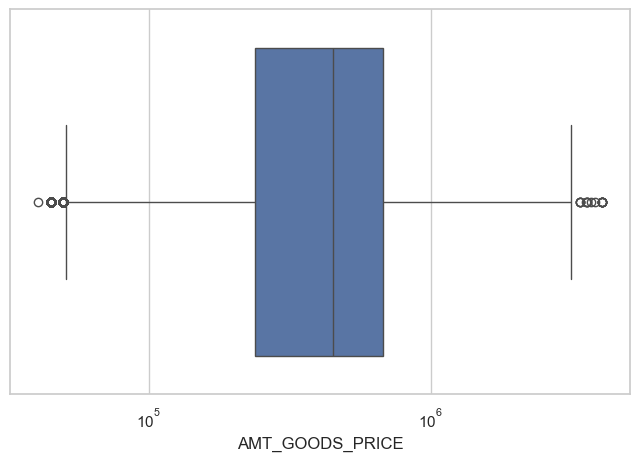


Box Plot for  REGION_POPULATION_RELATIVE


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


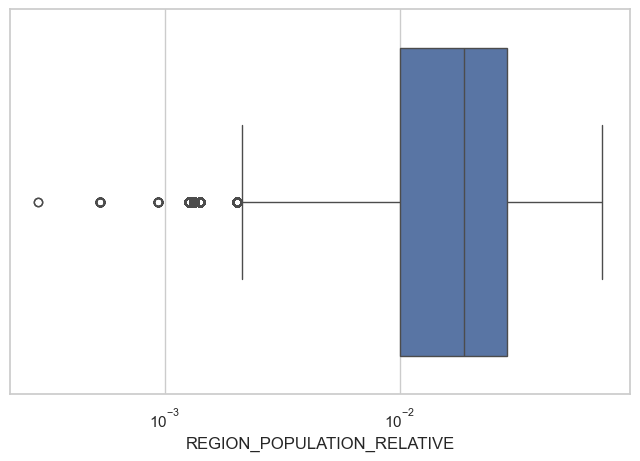


Box Plot for  DAYS_BIRTH


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1196: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  x_visible = any(t.get_visible() for t in ax.get_xticklabels())


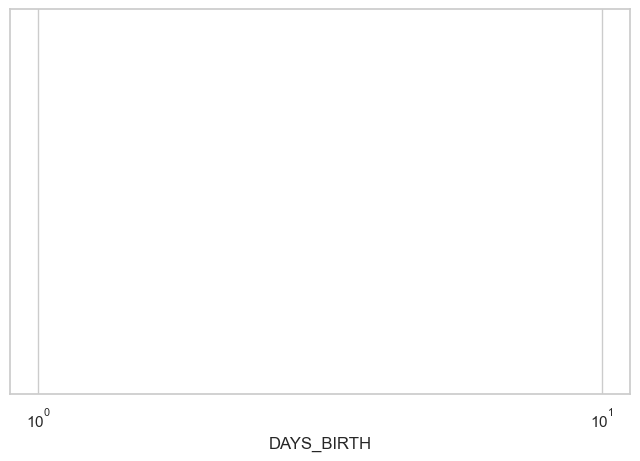


Box Plot for  DAYS_EMPLOYED


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


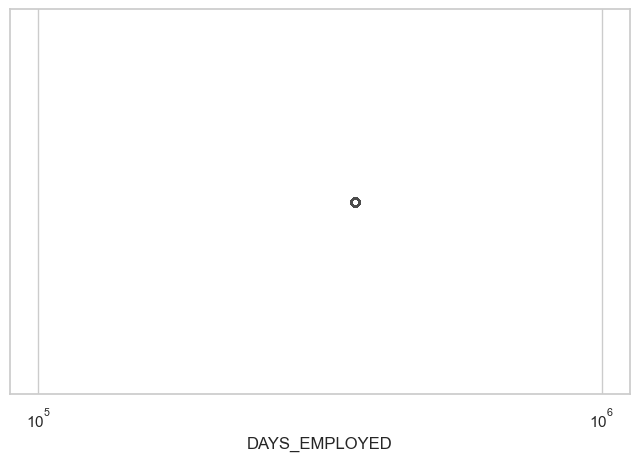


Box Plot for  DAYS_ID_PUBLISH


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1196: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  x_visible = any(t.get_visible() for t in ax.get_xticklabels())


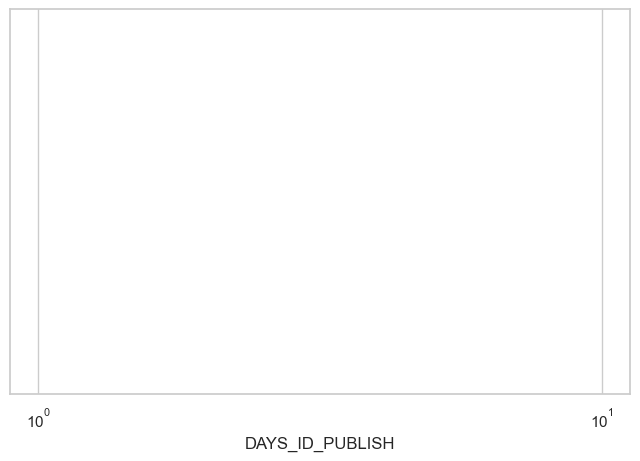

C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))



Box Plot for  ORGANIZATION_TYPE


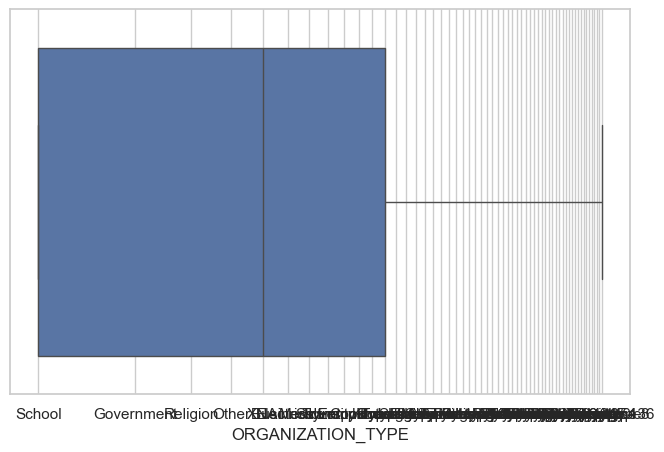


Box Plot for  EXT_SOURCE_2


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


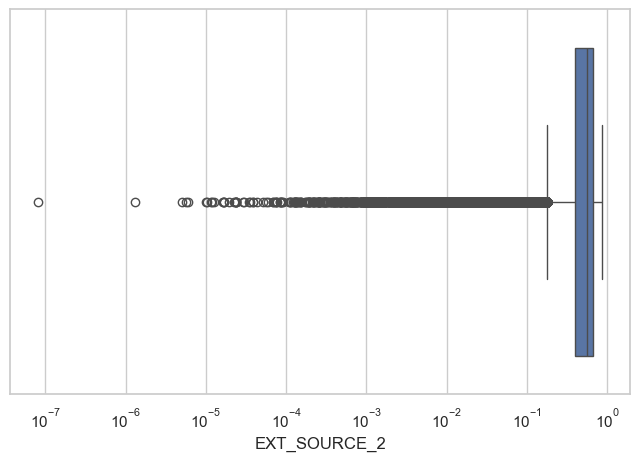


Box Plot for  EXT_SOURCE_3


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


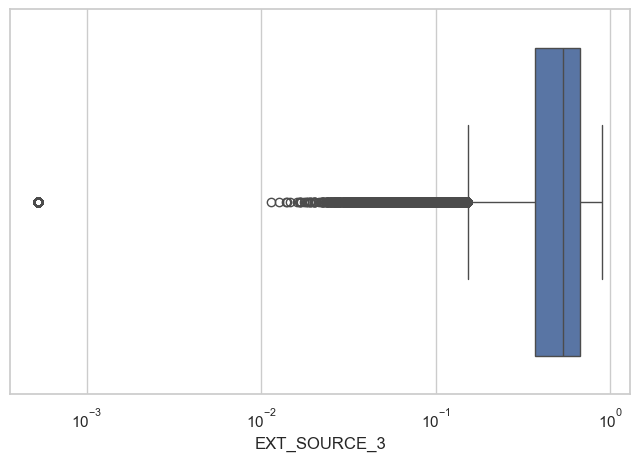

In [419]:
for col in df1_num_cols:
    print('Box Plot for ',col)
    plt.figure(figsize=(8,5))
    sns.set(style='whitegrid')
    plt.xscale('log')
    sns.boxplot(data =df_application_data, x=col,orient='v')
    plt.show()
    print()

In [420]:
df_application_data[df1_num_cols].head()

SK_ID_CURR  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      100002          202500.0    406597.5      24700.5         351000.0   
1      100003          270000.0   1293502.5      35698.5        1129500.0   
2      100004           67500.0    135000.0       6750.0         135000.0   
3      100006          135000.0    312682.5      29686.5         297000.0   
4      100007          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
0                    0.018801       -9461           -637            -2120   
1                    0.003541      -16765          -1188             -291   
2                    0.010032      -19046           -225            -2531   
3                    0.008019      -19005          -3039            -2437   
4                    0.028663      -19932          -3038            -3458   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  
0  Business Entity Type 3      0.262949      0.139376  
1                  School      0.622246           NaN  
2              Government      0.555912      0.729567  
3  Business Entity Type 3      0.650442           NaN  
4                Religion      0.322738           NaN

In [421]:
df_application_data[df1_cat_cols].head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             0          Working  Secondary / secondary special   
1             0    State servant               Higher education   
2             0          Working  Secondary / secondary special   
3             0          Working  Secondary / secondary special   
4             0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  Single / not married  House / apartment        Laborers              1.0   
1               Married  House / apartment      Core staff              2.0   
2  Single / not married  House / apartment        Laborers              1.0   
3        Civil marriage  House / apartment        Laborers              2.0   
4  Single / not married  House / apartment      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR SALARY_RANGE  
0                        0.0                         1.0           MH  
1                        0.0                         0.0           MH  
2                        0.0                         0.0            L  
3                        NaN                         NaN            M  
4                        0.0                         0.0            M

In [422]:
# null value % for numeric columns
100*df_application_data[df1_num_cols].isnull().mean().sort_values(ascending=False)

EXT_SOURCE_3                  19.825307
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
SK_ID_CURR                     0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_ID_PUBLISH                0.000000
ORGANIZATION_TYPE              0.000000
dtype: float64

#### OCCUPATION_TYPE column has the highest numbers of missing values
 I will not going to fill the missing values with mode rathrer fill the values with 'unknown'

In [423]:
# percentage of missing values of occupation type
df_application_data.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [424]:
df_application_data.OCCUPATION_TYPE = df_application_data.OCCUPATION_TYPE.fillna('unknown')

In [425]:
# to confirm that no more null data present in occupation type
df_application_data.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [426]:
# impute only numeric columns data with mean value
for i in df1_num_cols:
    if df_application_data[i].isnull().mean()>0:
        med=df_application_data[i].median()
        df_application_data[i]=df_application_data[i].fillna(med)

In [427]:
# null value % for numeric columns after imputation
100*df_application_data[df1_num_cols].isnull().mean()

SK_ID_CURR                    0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_ID_PUBLISH               0.0
ORGANIZATION_TYPE             0.0
EXT_SOURCE_2                  0.0
EXT_SOURCE_3                  0.0
dtype: float64

In [428]:
# impute only numeric columns data with mode value
for i in df1_cat_cols:
    if df_application_data[i].isnull().mean()>0:
        mode=df_application_data[i].mode()[0]
        df_application_data[i]=df_application_data[i].fillna(mode)

In [429]:
# null value % for categorical columns after imputation
100*df_application_data[df1_cat_cols].isnull().mean()

TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_YEAR     0.0
SALARY_RANGE                   0.0
dtype: float64

In [430]:
# Checking the counts of defaulters in the given data set
df_application_data.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [431]:
df_application_data[df_application_data.TARGET == 1].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          351000.0               Working  Secondary / secondary special   
26         702000.0               Working  Secondary / secondary special   
40         855000.0  Commercial associate  Secondary / secondary special   
42         238500.0               Working  Secondary / secondary special   
81         252000.0             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0        -9461           -637            -2120        Laborers   
26      -18724          -2628            -1827   Cooking staff   
40      -17482          -1262            -1029        Laborers   
42      -13384          -3597            -4409     Sales staff   
81      -24794         365243            -4199         unknown   

    CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0               1.0                     2                            2   
26              1.0                     3                            2   
40              2.0                     2                            2   
42              2.0                     3                            3   
81              2.0                     2                            2   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

         ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0   Business Entity Type 3      0.262949      0.139376   
26  Business Entity Type 3      0.548477      0.190706   
40  Business Entity Type 3      0.306841      0.320163   
42           Self-employed      0.674203      0.399676   
81                     XNA      0.023952      0.720944   

    AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        0.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        2.0   
42                       

In [433]:
# Checking all available columns
df_application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'SALARY_RANGE'],
      dtype='object')

In [434]:
# creating new Column of age in year based on the DAYS_BIRTH
df_application_data['AGE'] = abs(df_application_data['DAYS_BIRTH']//365)

In [435]:
# Creating Age Group Bins
df_application_data['AGE_GROUP'] = pd.cut(x=df_application_data['AGE'], bins=[20, 30, 40, 50, 60, 70], labels=['20 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70']) 

In [436]:
# DAYS_BIRTH is of no use now hence dropping the column
df_application_data.drop('DAYS_BIRTH',axis=1,inplace=True)

In [437]:
# converting the DAYS_EMPLOYED in YEAR_EMPLOYED and dropping the DAYS_EMPLOYED column
df_application_data['YEAR_EMPLOYED'] = abs(df_application_data['DAYS_EMPLOYED']//365)
df_application_data.drop('DAYS_EMPLOYED',axis=1,inplace=True)

In [439]:
# checking the head
df_application_data.YEAR_EMPLOYED.head()

0    2
1    4
2    1
3    9
4    9
Name: YEAR_EMPLOYED, dtype: int64

##### Remove the outliers from numerical columns

Box Plot for  SK_ID_CURR


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


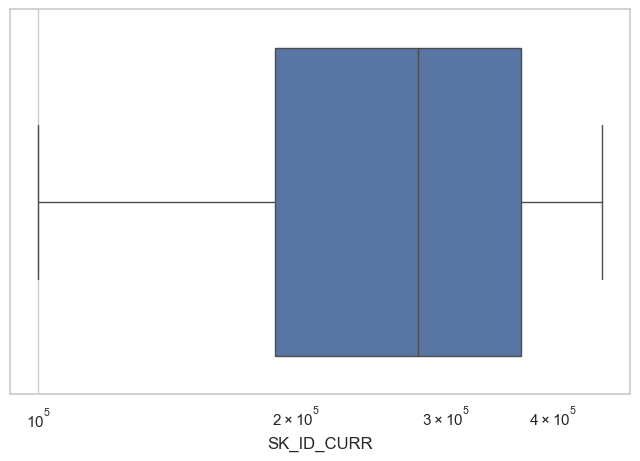


Box Plot for  AMT_INCOME_TOTAL


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


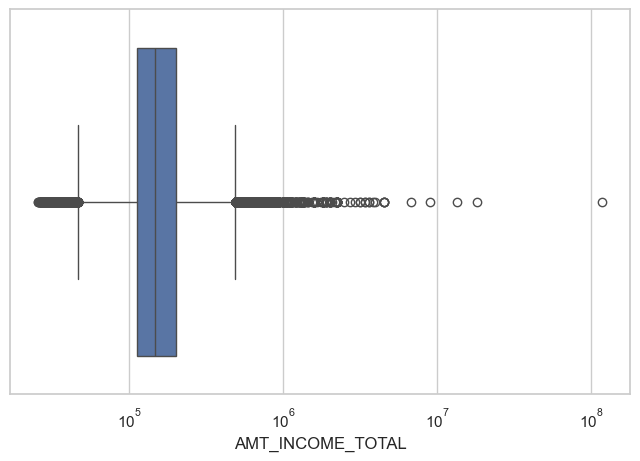


Box Plot for  AMT_CREDIT


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


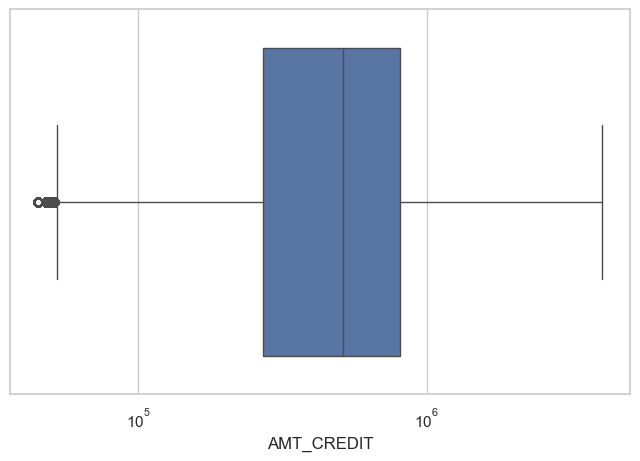


Box Plot for  AMT_ANNUITY


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


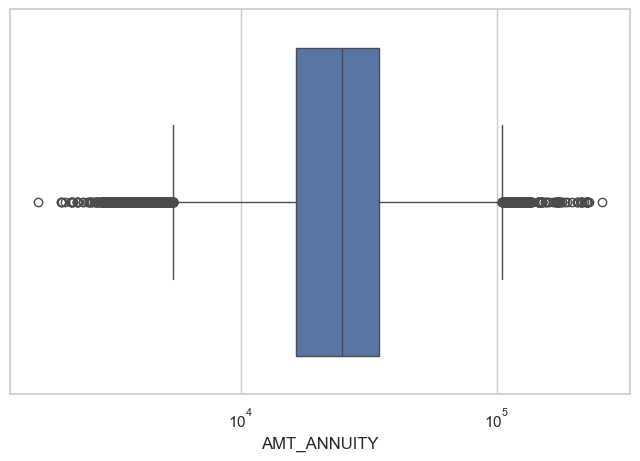


Box Plot for  AMT_GOODS_PRICE


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


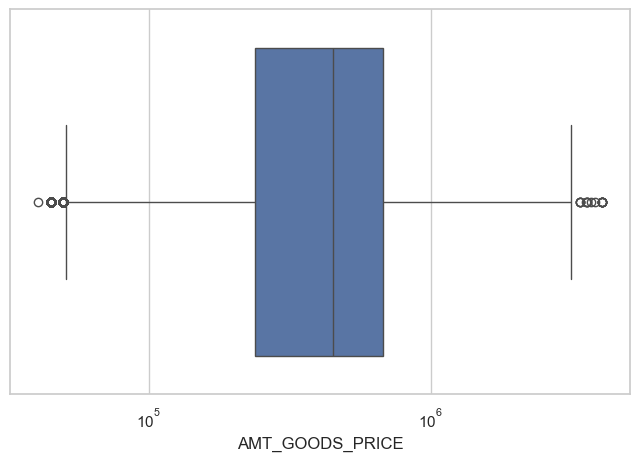


Box Plot for  REGION_POPULATION_RELATIVE


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


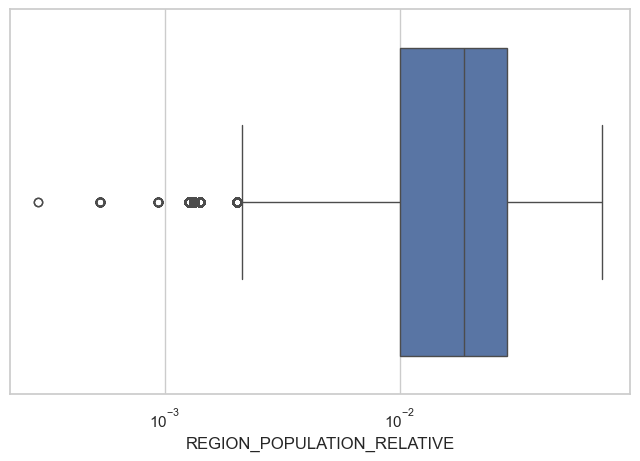


Box Plot for  DAYS_BIRTH


ValueError: Could not interpret value `DAYS_BIRTH` for `x`. An entry with this name does not appear in `data`.

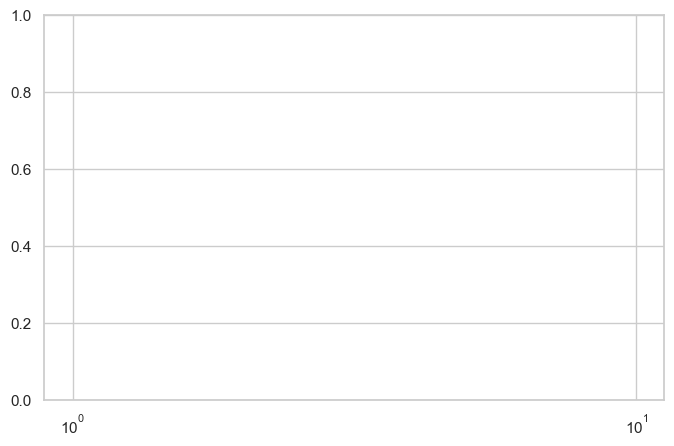

In [440]:
for col in df1_num_cols:
    print('Box Plot for ',col)
    plt.figure(figsize=(8,5))
    sns.set(style='whitegrid')
    plt.xscale('log')
    sns.boxplot(data =df_application_data, x=col,orient='v')
    plt.show()
    print()

In [441]:
total_rows = df_application_data.shape[0]
total_rows

307511

In [442]:
col_list_outlier = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
for col in col_list_outlier: 
    q1 = df_application_data[col].quantile(0.25)
    q3 = df_application_data[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_application_data = df_application_data.loc[(df_application_data[col] > range_low) & (df_application_data[col] < range_high)]

df_application_data.shape

(288500, 36)

Box Plot for  SK_ID_CURR


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


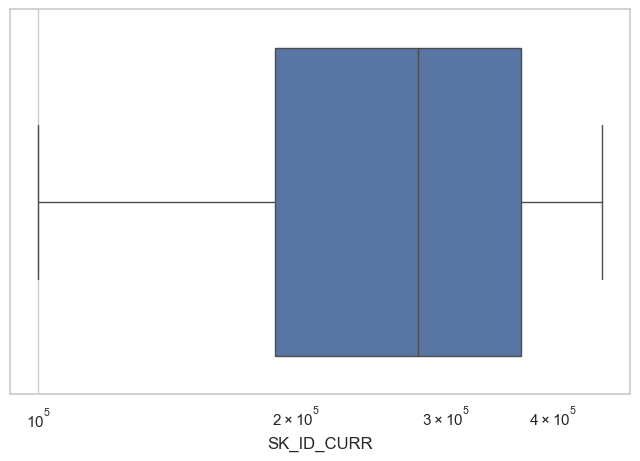


Box Plot for  AMT_INCOME_TOTAL


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


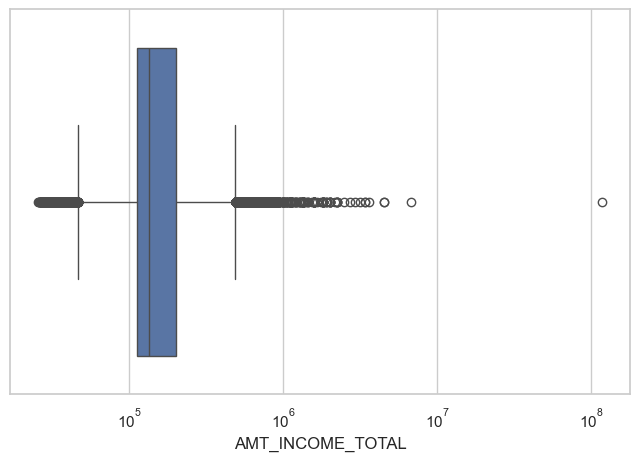


Box Plot for  AMT_CREDIT


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


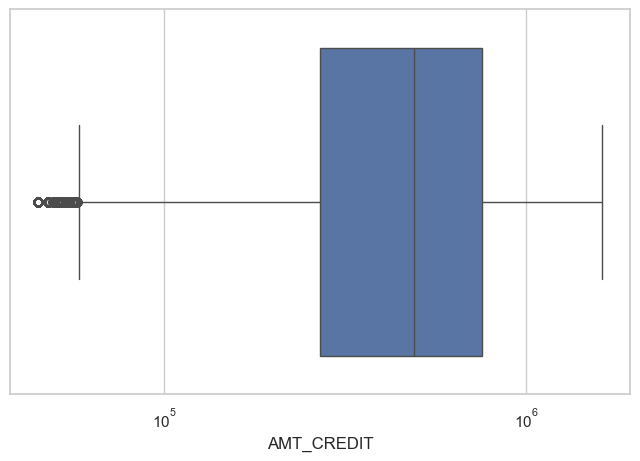


Box Plot for  AMT_ANNUITY


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


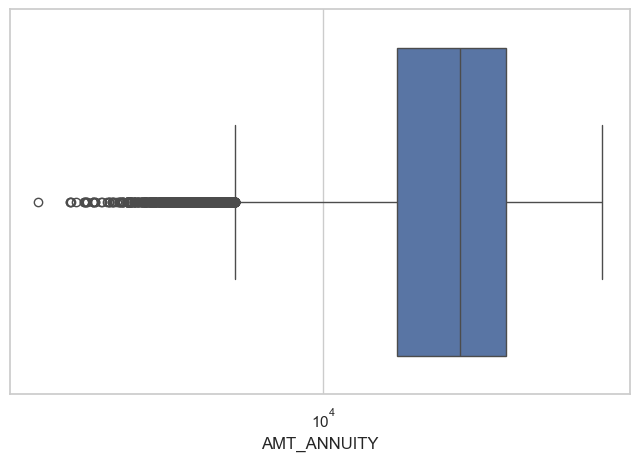


Box Plot for  AMT_GOODS_PRICE


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


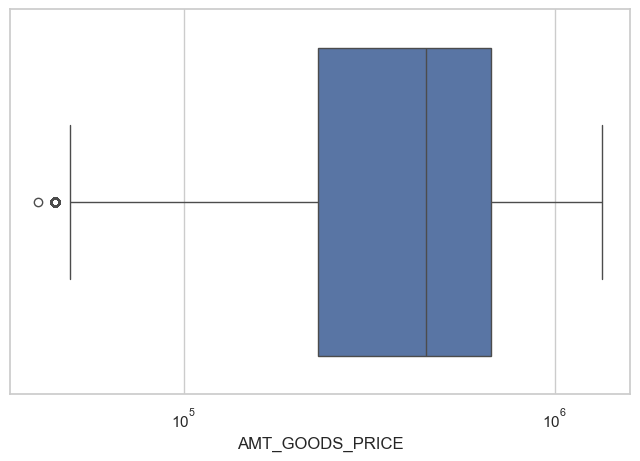


Box Plot for  REGION_POPULATION_RELATIVE


C:\Users\SOUVIK SARKAR\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


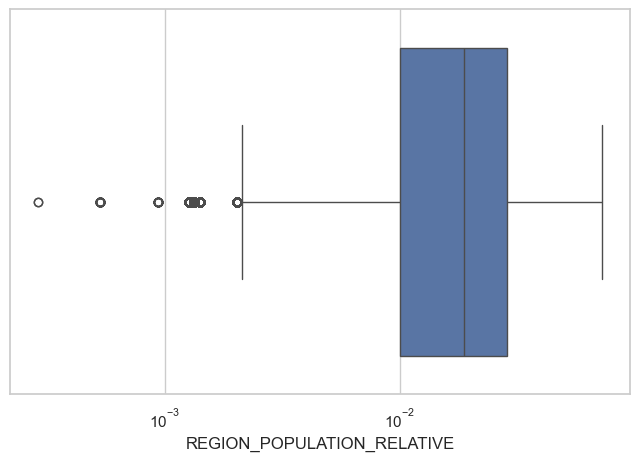


Box Plot for  DAYS_BIRTH


ValueError: Could not interpret value `DAYS_BIRTH` for `x`. An entry with this name does not appear in `data`.

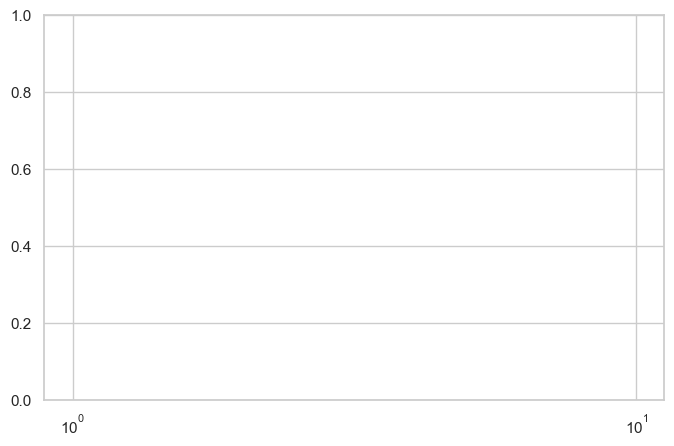

In [443]:
for col in df1_num_cols:
    print('Box Plot for ',col)
    plt.figure(figsize=(8,5))
    sns.set(style='whitegrid')
    plt.xscale('log')
    sns.boxplot(data =df_application_data, x=col,orient='v')
    plt.show()
    print()

In [444]:
# percentage of data removed due to the presence of outliers
round((100 - 100*(len(df_application_data.index)/total_rows)),2)

6.18

****** Note : only 6.18% data have lost due to the removing of outliers.

##### Note: While doing analysis of defaultrs and non defaulters w.r.t. gender I see the presence of 'XNA' which is definitly an error. Need to clear those records

In [445]:
df_application_data.CODE_GENDER.value_counts()

CODE_GENDER
F      190915
M       97581
XNA         4
Name: count, dtype: int64

In [446]:
df_application_data = df_application_data[~(df_application_data.CODE_GENDER == 'XNA')]

In [447]:
df_application_data.shape

(288496, 36)

In [449]:
#### Checking for number of Years Employed outliers
df_application_data.YEAR_EMPLOYED.value_counts(normalize=True)*100

YEAR_EMPLOYED
1000    18.276163
2       10.485414
3        9.736010
1        9.197701
4        8.192141
5        7.069422
6        5.252413
7        4.865232
8        4.218083
9        3.667988
10       2.866591
11       2.342840
12       1.866230
13       1.692571
15       1.481823
14       1.381995
16       0.853045
17       0.740392
18       0.629471
19       0.600355
20       0.593422
21       0.507459
22       0.459278
23       0.396539
24       0.322015
25       0.293938
26       0.267248
28       0.211095
27       0.208668
29       0.193070
30       0.182325
31       0.148009
32       0.137610
35       0.113346
33       0.107800
34       0.107107
36       0.081457
37       0.060659
38       0.044021
40       0.040209
39       0.035356
42       0.019411
41       0.016638
43       0.012825
45       0.010052
44       0.006586
46       0.004160
49       0.001387
47       0.001040
0        0.000693
48       0.000347
50       0.000347
Name: proportion, dtype: float64

In [450]:
df_application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'SALARY_RANGE', 'AGE', 'AGE_GROUP',
       'YEAR_EMPLOYED'],
      dtype='object')

In [451]:
# Clearly we can see there is 1 outlier with years employed as 1000 which is erroneous
# We can replace this value with 1 as clearly a person cant work for 1000 years
df_application_data['YEAR_EMPLOYED'] = df_application_data['YEAR_EMPLOYED'].replace(1000,df_application_data['YEAR_EMPLOYED'].median())

C:\Users\SOUVIK SARKAR\AppData\Local\Temp\ipykernel_66392\930811393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_data['YEAR_EMPLOYED'] = df_application_data['YEAR_EMPLOYED'].replace(1000,df_application_data['YEAR_EMPLOYED'].median())


In [453]:
#### Checking for number of Years Employed outliers
(df_application_data.YEAR_EMPLOYED.value_counts(normalize=True)*100).sort_values(ascending=False)

YEAR_EMPLOYED
7     23.141395
2     10.485414
3      9.736010
1      9.197701
4      8.192141
5      7.069422
6      5.252413
8      4.218083
9      3.667988
10     2.866591
11     2.342840
12     1.866230
13     1.692571
15     1.481823
14     1.381995
16     0.853045
17     0.740392
18     0.629471
19     0.600355
20     0.593422
21     0.507459
22     0.459278
23     0.396539
24     0.322015
25     0.293938
26     0.267248
28     0.211095
27     0.208668
29     0.193070
30     0.182325
31     0.148009
32     0.137610
35     0.113346
33     0.107800
34     0.107107
36     0.081457
37     0.060659
38     0.044021
40     0.040209
39     0.035356
42     0.019411
41     0.016638
43     0.012825
45     0.010052
44     0.006586
46     0.004160
49     0.001387
47     0.001040
0      0.000693
48     0.000347
50     0.000347
Name: proportion, dtype: float64

#### Data Imbalance

In [454]:
# checking for data imbalance in Target column
df_application_data.TARGET.value_counts(normalize=True)*100

TARGET
0    91.675101
1     8.324899
Name: proportion, dtype: float64

In [455]:
 91.675101/8.324899

11.012157745096967

In [456]:
# As most of the data belong to '0' compared to '1' in Target column, which clearly depicts the presence of data imbalance.
# Calculating data imbalance ratio
round(len(df_application_data[df_application_data.TARGET==0]) / len(df_application_data[df_application_data.TARGET==1]),2)

11.01

#####  ******* Plotting the data imbalance in Pie chart

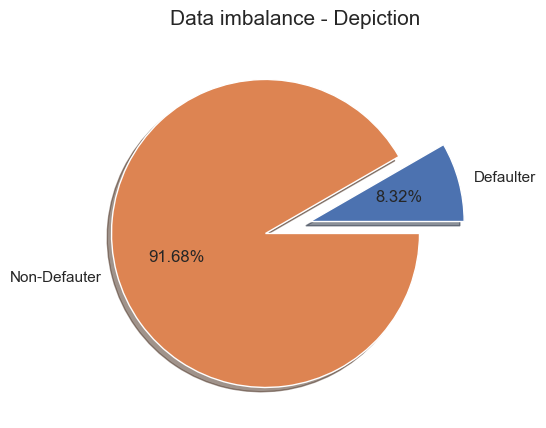

In [457]:
x = ['Defaulter','Non-Defauter']
y = [len(df_application_data[df_application_data.TARGET==1]), len(df_application_data[df_application_data.TARGET==0])]
plt.figure(figsize=(12,5))
plt.pie(y, data=df_application_data.TARGET, labels=x, autopct='%1.2f%%', shadow=True, explode= (0.1, 0.2))
plt.title('Data imbalance - Depiction',fontdict={'fontsize':15})
plt.show()

In [458]:
# segregating datasets for target=1(client with payment difficulties) and target=0(all other)

target_0=df_application_data.loc[df_application_data["TARGET"]==0]
target_1=df_application_data.loc[df_application_data["TARGET"]==1]

###  Univariate Analysis [Categorical columns]

##### Defaulters and Non-Defaulters Gender analysis

[Text(0.5, 0, 'Gender')]

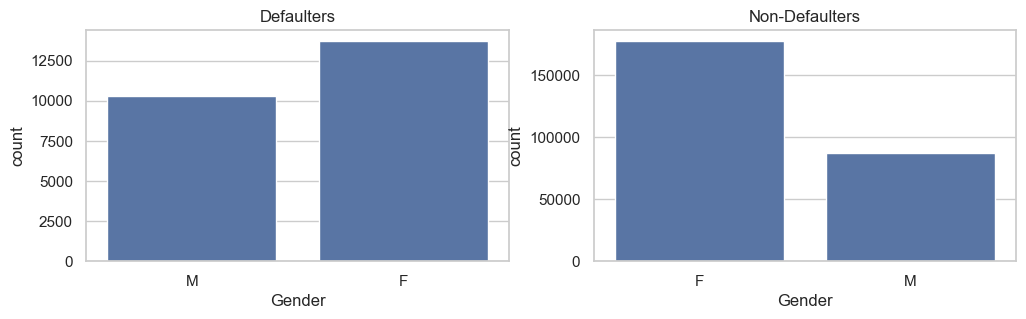

In [459]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)    
ax=sns.countplot(x = 'CODE_GENDER',data=target_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

##### ***** Analysis 
Due to the high population of female applicants in sample data 
 - Both in defaulters and non defaulters list female applicants are dominating

In [460]:
# Now check for the % of defaulters in each gender category
male_defaulter = target_1[target_1.CODE_GENDER == 'M']
total_male = df_application_data[df_application_data.CODE_GENDER == 'M']
percentage_male_defaulter = (male_defaulter.shape[0]/total_male.shape[0]) * 100

female_defaulter = target_1[target_1.CODE_GENDER == 'F']
total_female = df_application_data[df_application_data.CODE_GENDER == 'F']
percentage_female_defaulter = (female_defaulter.shape[0]/total_female.shape[0]) * 100

In [461]:
print(percentage_male_defaulter)
print(percentage_female_defaulter)

10.558407886781238
7.183301469240237


###### ********* Analysis

Even though the female ratio is much higer in the sample. Still percetage of male defaulters is much higher than female defaulters.

##### Defaulters and Non-Defaulters Loan-Type analysis

[Text(0.5, 0, 'Loan type')]

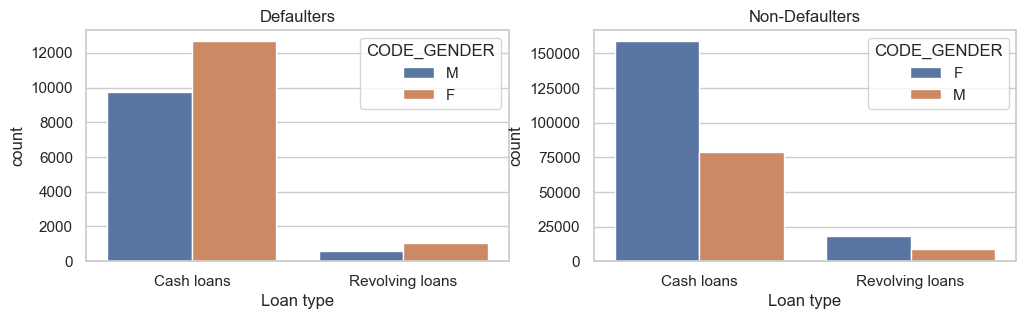

In [462]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',hue = 'CODE_GENDER',data=target_1)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',hue = 'CODE_GENDER',data=target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')

##### ***** Analysis 
Sample population has mostly applied for 'Cash Loans' due to which in both defaulters and non-defaulters lists cash loans has the highest records  

##### Defaulters and Non-Defaulters Income Type analysis

C:\Users\SOUVIK SARKAR\AppData\Local\Temp\ipykernel_66392\2168577287.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\SOUVIK SARKAR\AppData\Local\Temp\ipykernel_66392\2168577287.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


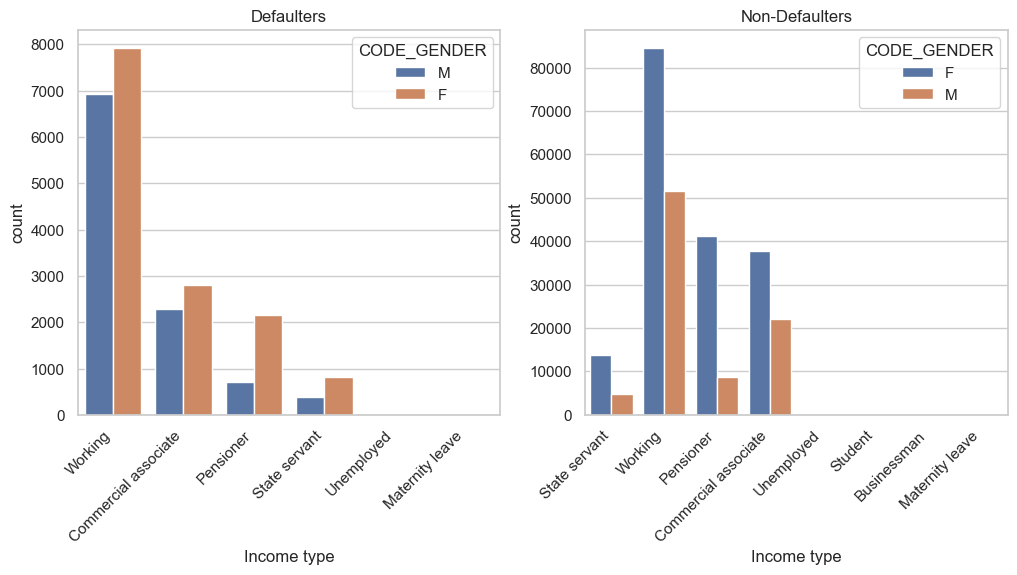

In [463]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',hue = 'CODE_GENDER',data=target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',hue = 'CODE_GENDER',data=target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### ***** Analysis 
 - Working class has applied most number of loans
 - In defaulters list as well working class is the dominant
 - In non defaulters lsit as well working class has the highest number of records.

In [464]:
df1_cat_cols.remove('TARGET')

In [465]:
# Creating the pie charts for all categorical cols
def plot_pie_chart(dataframe,column_name):
    fig = plt.figure(figsize=(8,5))
    dataframe[column_name].value_counts().plot.pie(autopct = "%1.0f%%" ,shadow=True)
    fig.tight_layout()
    plt.show()

*************** Pie Plot for  NAME_CONTRACT_TYPE  ***************


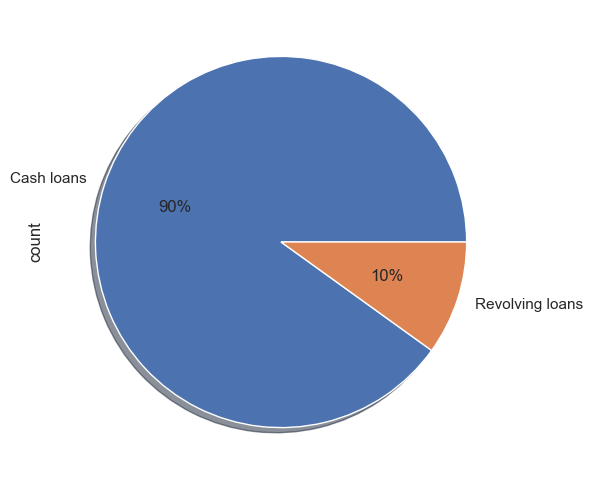

*************** Pie Plot for  CODE_GENDER  ***************


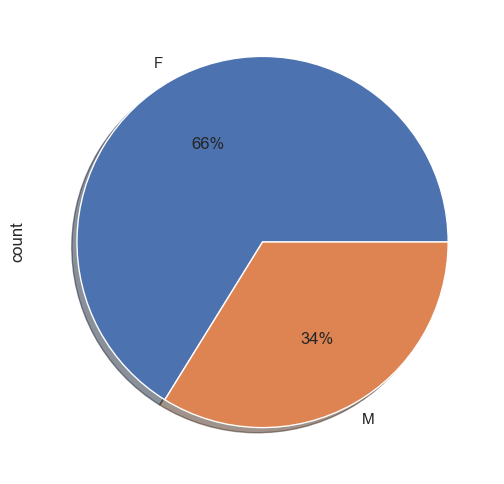

*************** Pie Plot for  FLAG_OWN_CAR  ***************


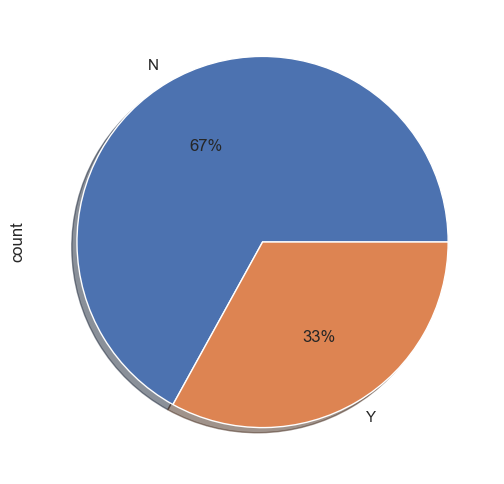

*************** Pie Plot for  FLAG_OWN_REALTY  ***************


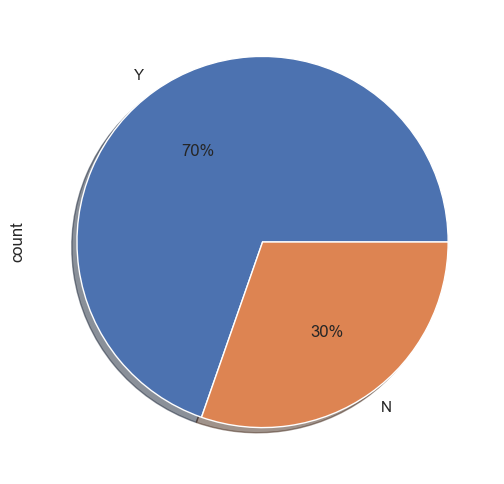

*************** Pie Plot for  CNT_CHILDREN  ***************


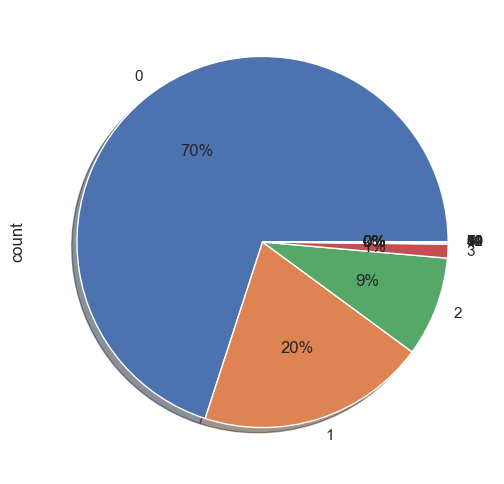

*************** Pie Plot for  NAME_INCOME_TYPE  ***************


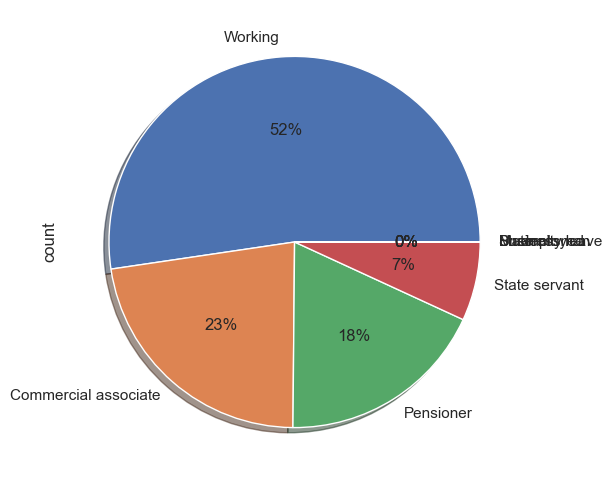

*************** Pie Plot for  NAME_EDUCATION_TYPE  ***************


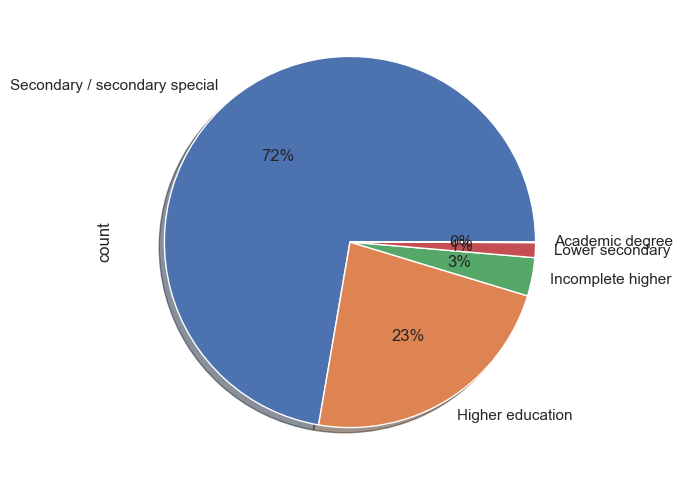

*************** Pie Plot for  NAME_FAMILY_STATUS  ***************


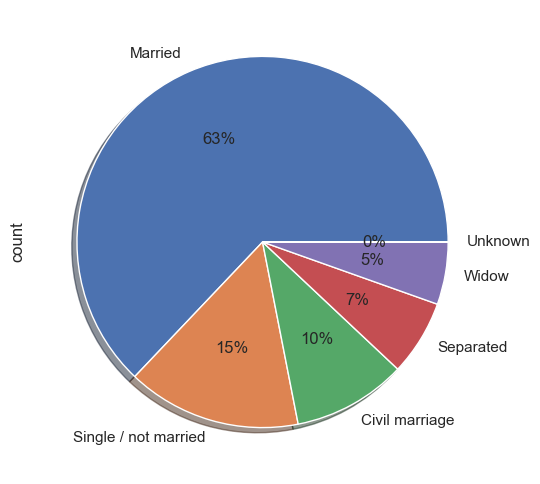

*************** Pie Plot for  NAME_HOUSING_TYPE  ***************


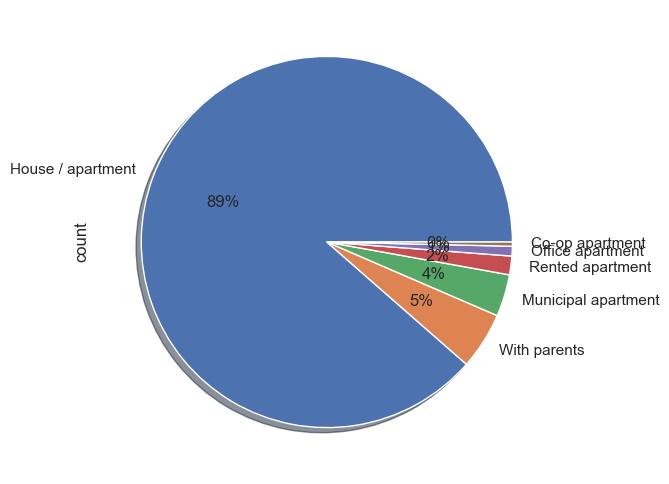

*************** Pie Plot for  OCCUPATION_TYPE  ***************


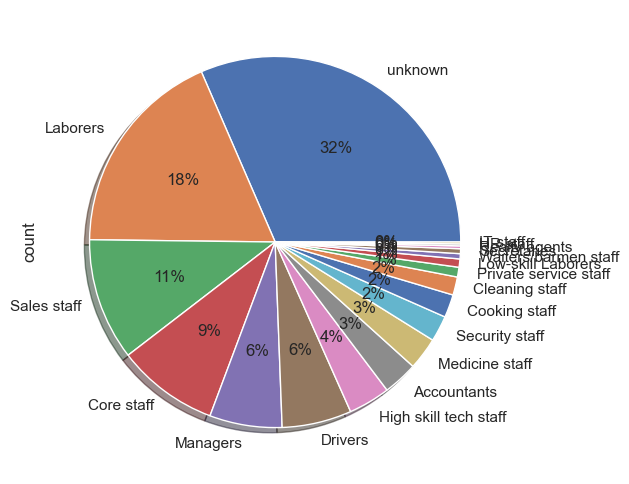

*************** Pie Plot for  CNT_FAM_MEMBERS  ***************


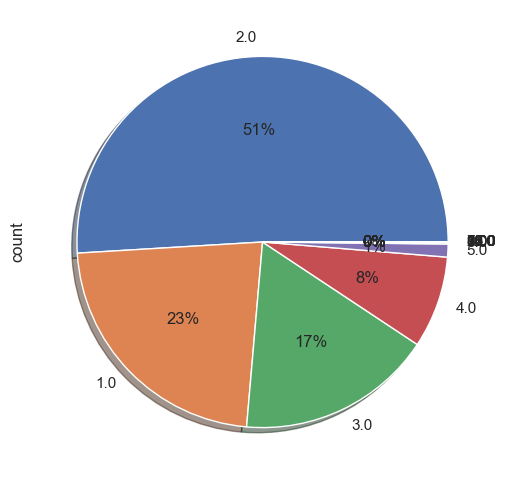

*************** Pie Plot for  REGION_RATING_CLIENT  ***************


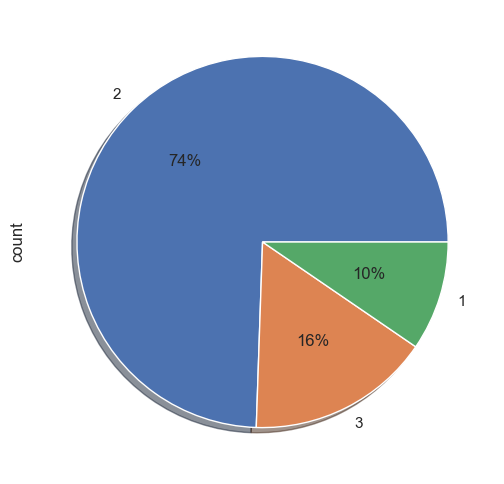

*************** Pie Plot for  REGION_RATING_CLIENT_W_CITY  ***************


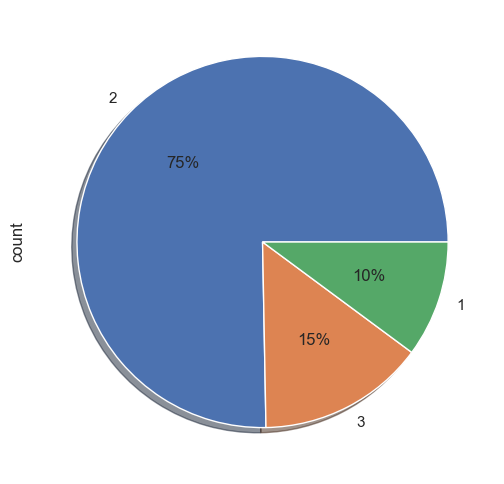

*************** Pie Plot for  REG_REGION_NOT_LIVE_REGION  ***************


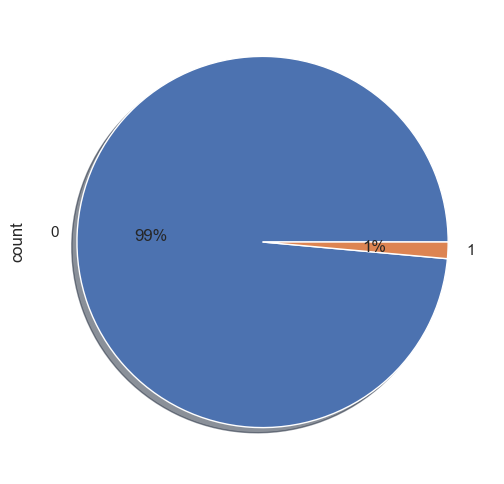

*************** Pie Plot for  REG_REGION_NOT_WORK_REGION  ***************


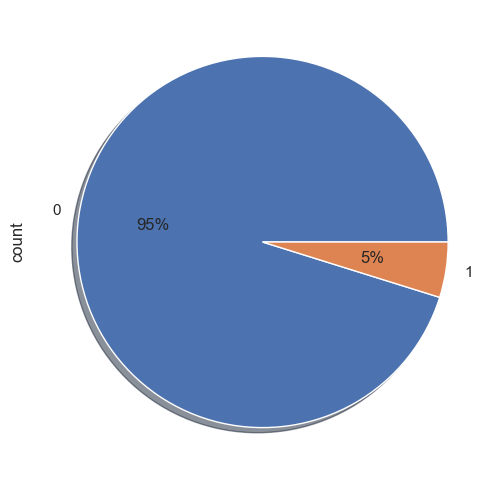

*************** Pie Plot for  AMT_REQ_CREDIT_BUREAU_HOUR  ***************


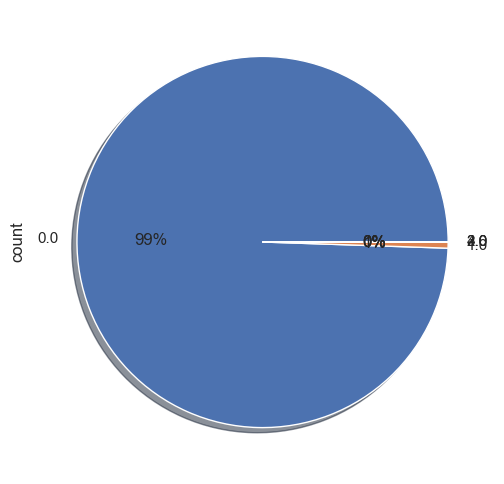

*************** Pie Plot for  AMT_REQ_CREDIT_BUREAU_DAY  ***************


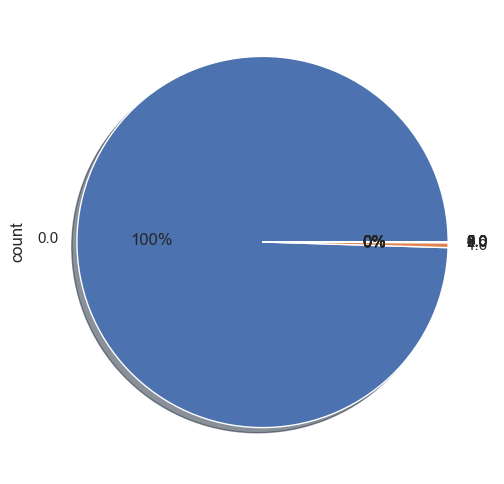

*************** Pie Plot for  AMT_REQ_CREDIT_BUREAU_WEEK  ***************


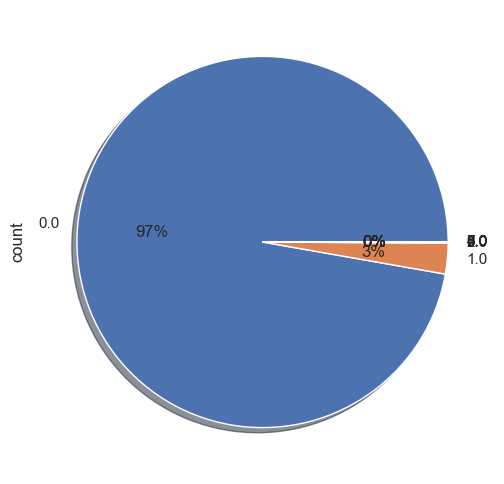

*************** Pie Plot for  AMT_REQ_CREDIT_BUREAU_MON  ***************


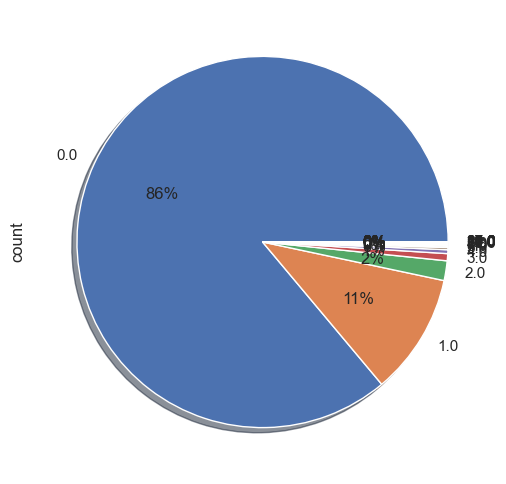

*************** Pie Plot for  AMT_REQ_CREDIT_BUREAU_QRT  ***************


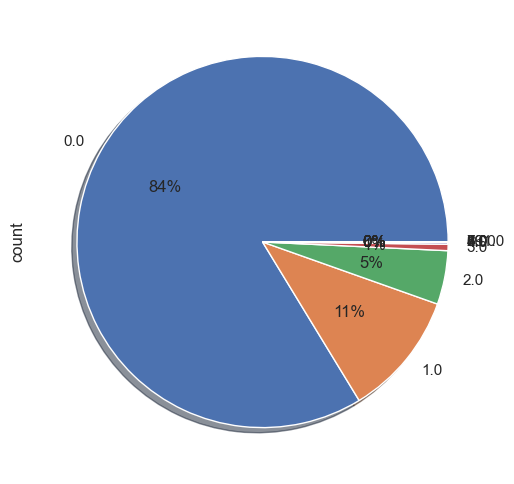

*************** Pie Plot for  AMT_REQ_CREDIT_BUREAU_YEAR  ***************


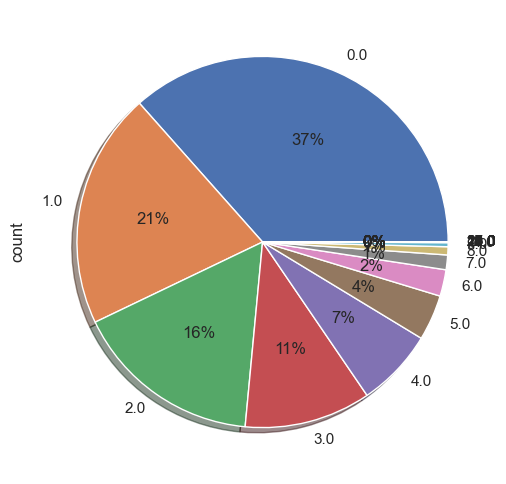

*************** Pie Plot for  SALARY_RANGE  ***************


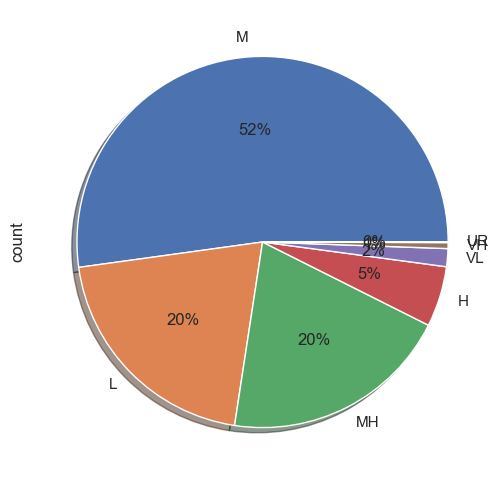

In [466]:
for col in df1_cat_cols:
    print('*************** Pie Plot for ',col,' ***************')
    plot_pie_chart(df_application_data,col)

In [467]:
# count plot for all categorical columns
def plot_count_chart(dataframe,column_name):
    print('*************** Count Plot for ',column_name,' ***************')
    fig = plt.figure(figsize=(5,3))
    plt.title("Plotting data for the column " + column_name)
    sns.countplot(x=column_name,hue='TARGET',data=dataframe)
    plt.xticks(rotation=90)
    plt.show()

*************** Count Plot for  NAME_CONTRACT_TYPE  ***************


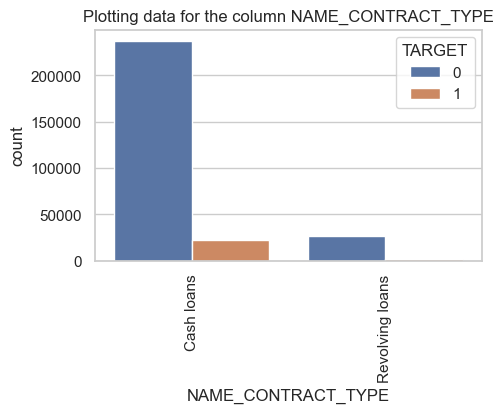

*************** Count Plot for  CODE_GENDER  ***************


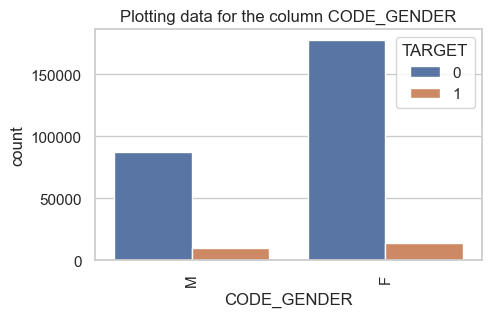

*************** Count Plot for  FLAG_OWN_CAR  ***************


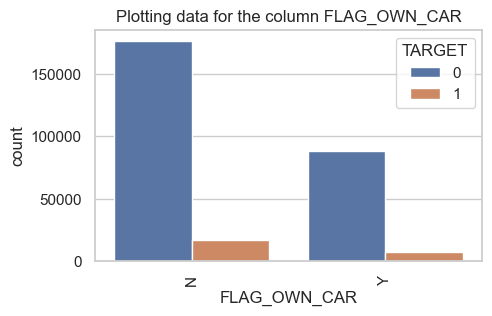

*************** Count Plot for  FLAG_OWN_REALTY  ***************


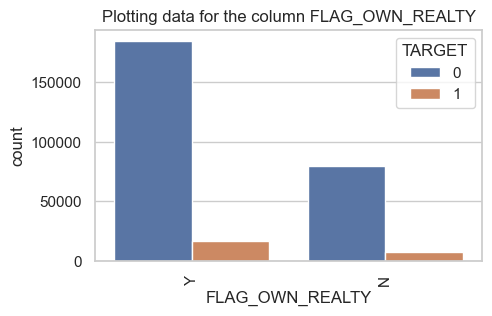

*************** Count Plot for  CNT_CHILDREN  ***************


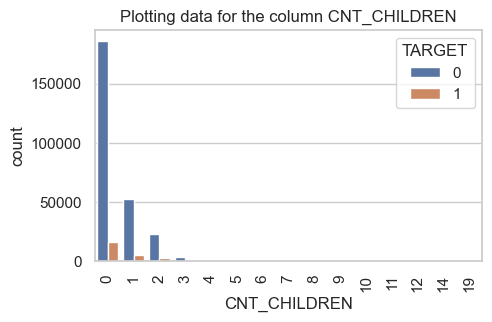

*************** Count Plot for  NAME_INCOME_TYPE  ***************


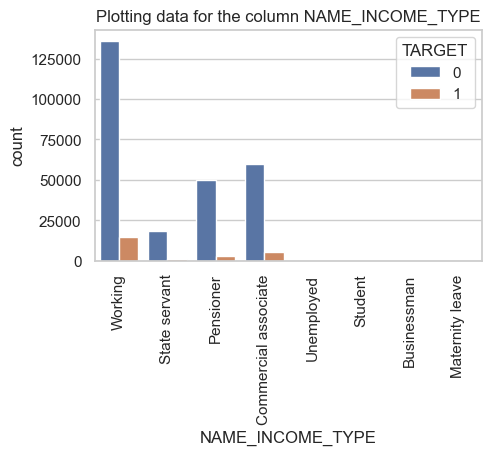

*************** Count Plot for  NAME_EDUCATION_TYPE  ***************


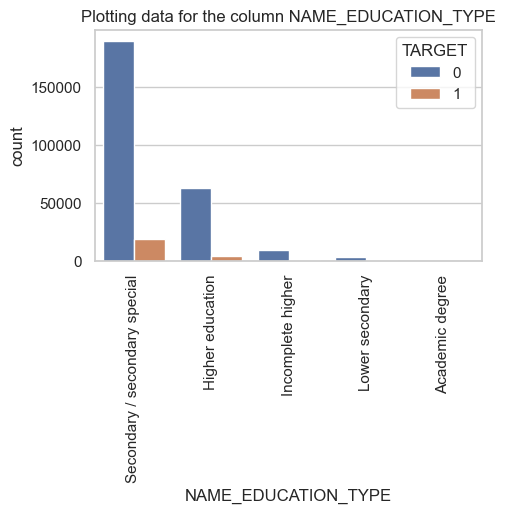

*************** Count Plot for  NAME_FAMILY_STATUS  ***************


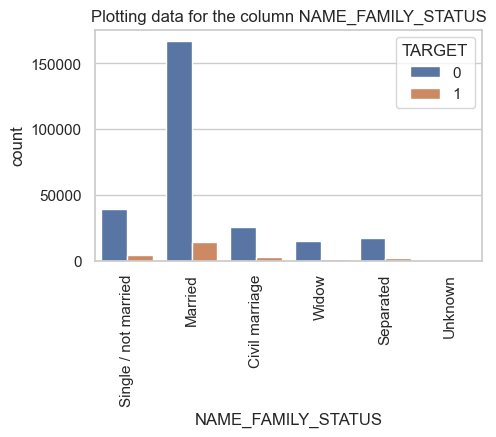

*************** Count Plot for  NAME_HOUSING_TYPE  ***************


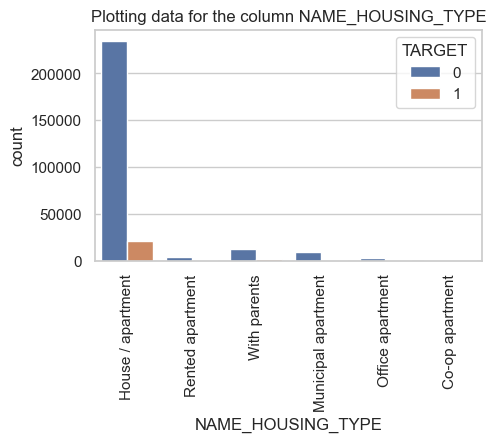

*************** Count Plot for  OCCUPATION_TYPE  ***************


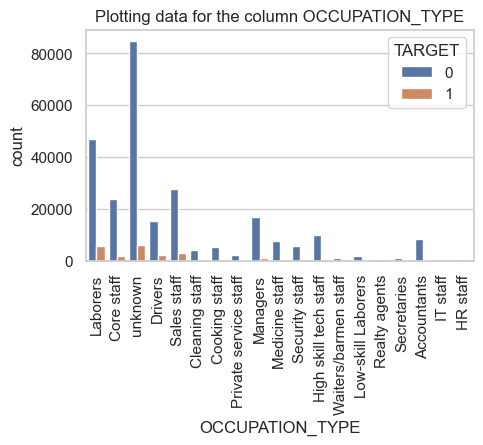

*************** Count Plot for  CNT_FAM_MEMBERS  ***************


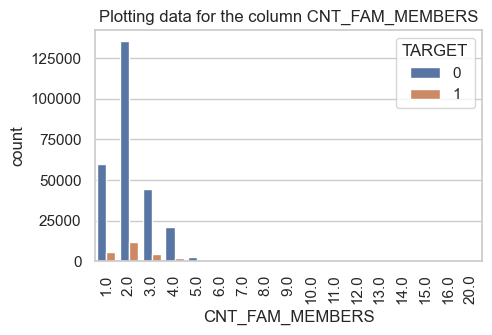

*************** Count Plot for  REGION_RATING_CLIENT  ***************


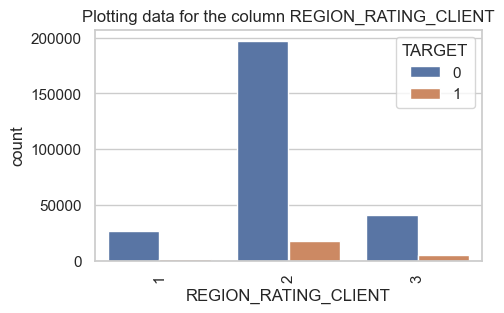

*************** Count Plot for  REGION_RATING_CLIENT_W_CITY  ***************


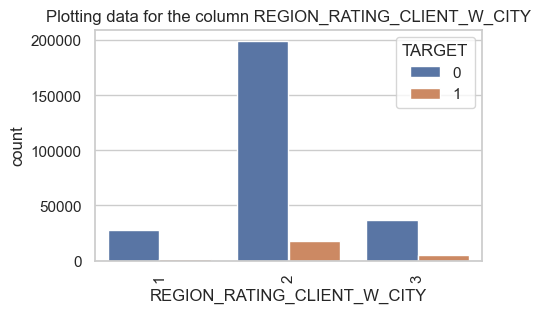

*************** Count Plot for  REG_REGION_NOT_LIVE_REGION  ***************


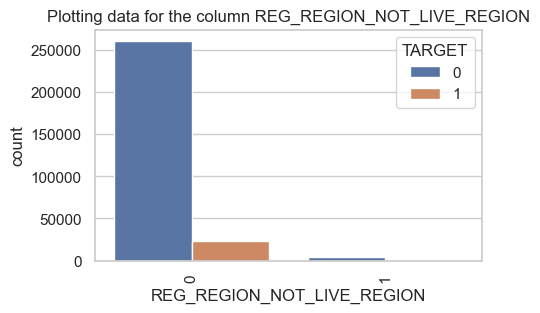

*************** Count Plot for  REG_REGION_NOT_WORK_REGION  ***************


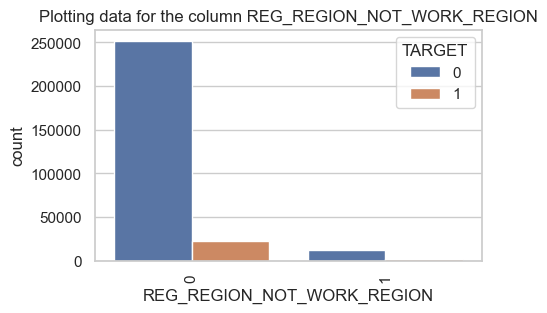

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_HOUR  ***************


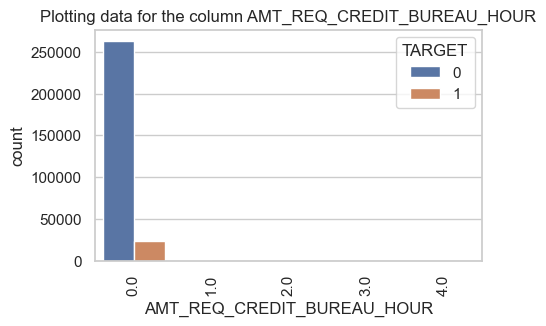

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_DAY  ***************


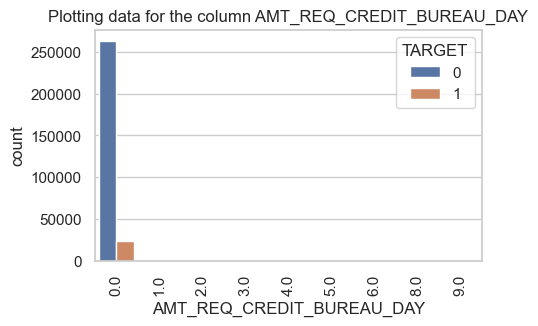

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_WEEK  ***************


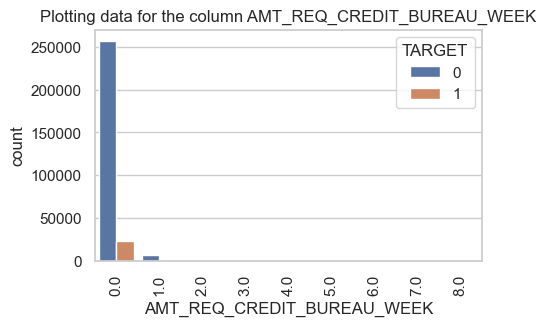

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_MON  ***************


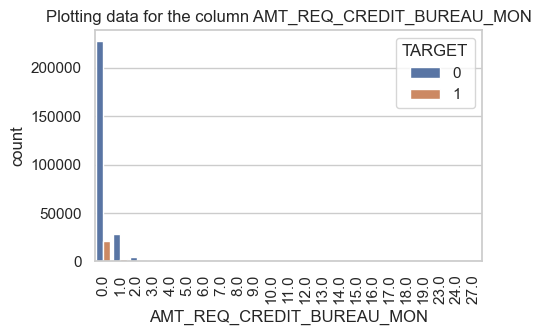

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_QRT  ***************


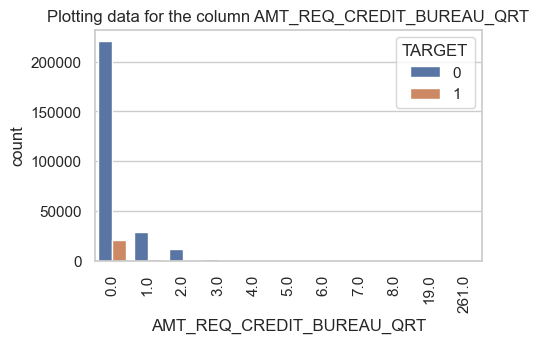

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_YEAR  ***************


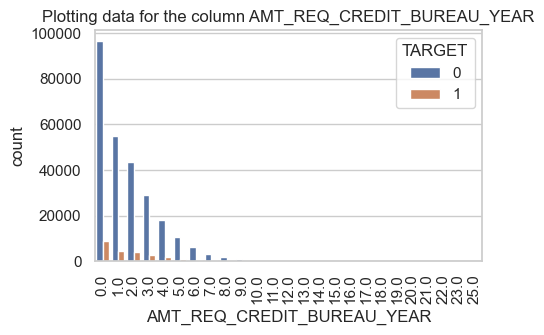

*************** Count Plot for  SALARY_RANGE  ***************


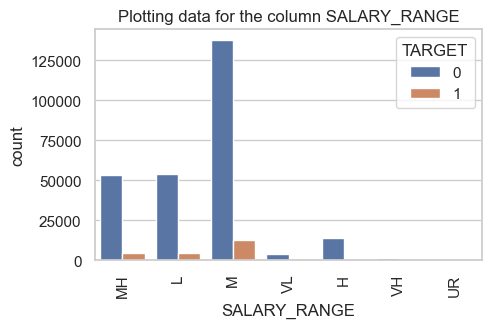

In [468]:
for col in df1_cat_cols:
    plot_count_chart(df_application_data,col)

In [469]:
# Creating bar chart based on the percentage

def plot_bar_func(dataframe,column_name):
    print('*************** Count Plot for ',column_name,' ***************')
    fig = plt.figure(figsize=(2,2))
    df=pd.DataFrame()
    df['0'] = ((target_0[column_name].value_counts())/len(target_0))
    df['1'] = ((target_1[column_name].value_counts())/len(target_1))
    df.plot.bar()
    plt.title("Plotting data in terms of percentage")
    plt.show()

*************** Count Plot for  NAME_CONTRACT_TYPE  ***************


<Figure size 200x200 with 0 Axes>

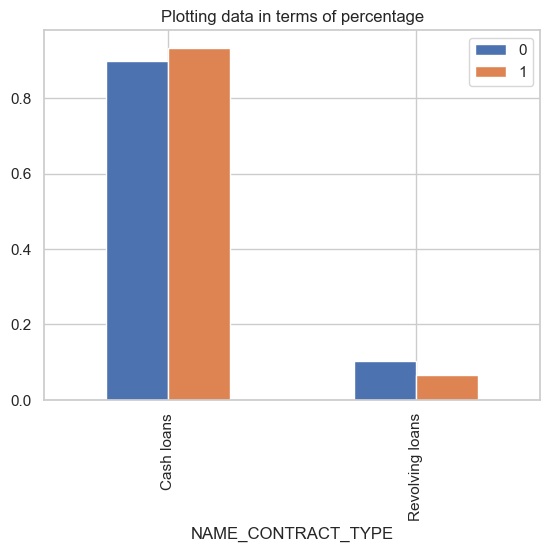

*************** Count Plot for  CODE_GENDER  ***************


<Figure size 200x200 with 0 Axes>

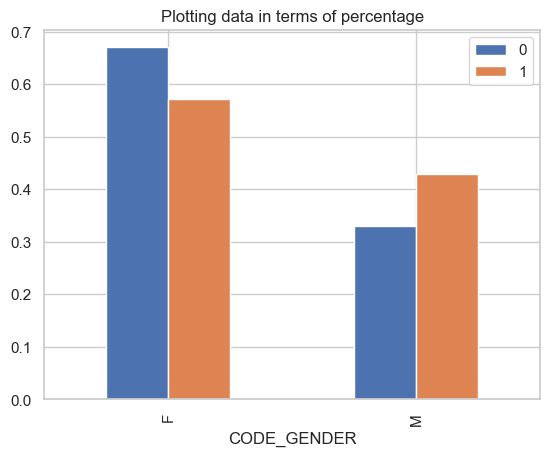

*************** Count Plot for  FLAG_OWN_CAR  ***************


<Figure size 200x200 with 0 Axes>

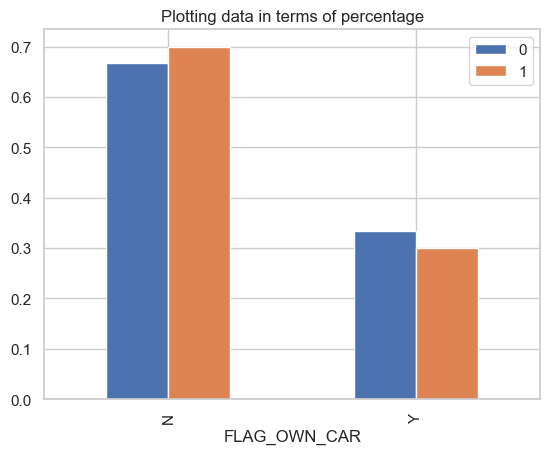

*************** Count Plot for  FLAG_OWN_REALTY  ***************


<Figure size 200x200 with 0 Axes>

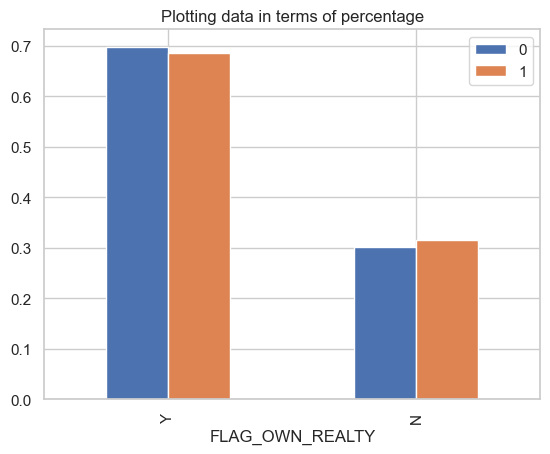

*************** Count Plot for  CNT_CHILDREN  ***************


<Figure size 200x200 with 0 Axes>

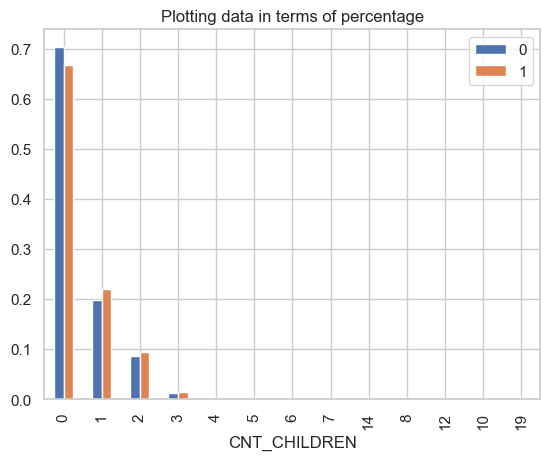

*************** Count Plot for  NAME_INCOME_TYPE  ***************


<Figure size 200x200 with 0 Axes>

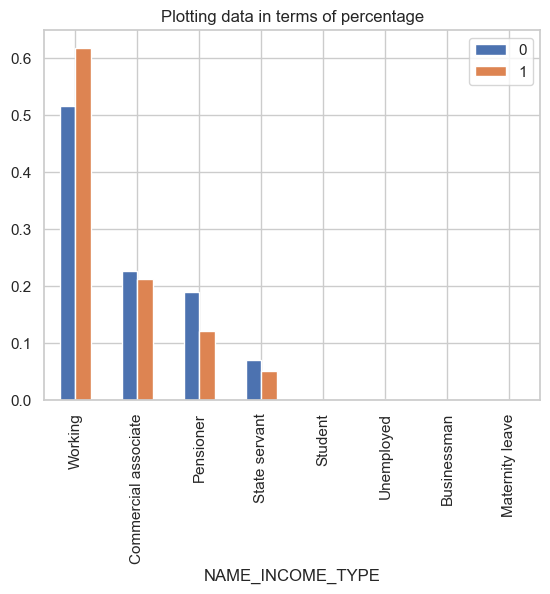

*************** Count Plot for  NAME_EDUCATION_TYPE  ***************


<Figure size 200x200 with 0 Axes>

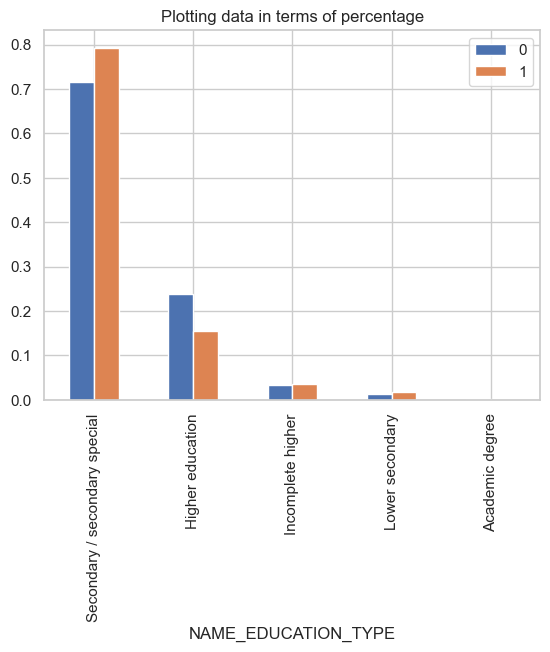

*************** Count Plot for  NAME_FAMILY_STATUS  ***************


<Figure size 200x200 with 0 Axes>

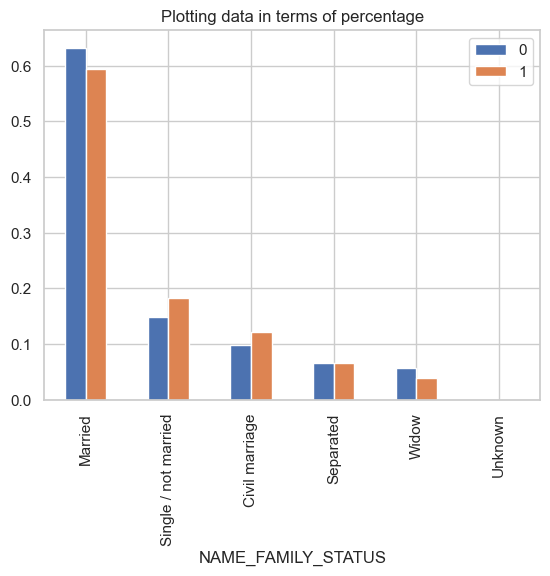

*************** Count Plot for  NAME_HOUSING_TYPE  ***************


<Figure size 200x200 with 0 Axes>

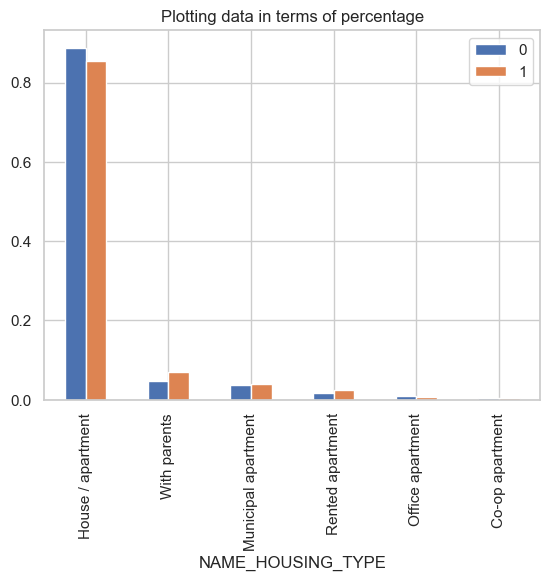

*************** Count Plot for  OCCUPATION_TYPE  ***************


<Figure size 200x200 with 0 Axes>

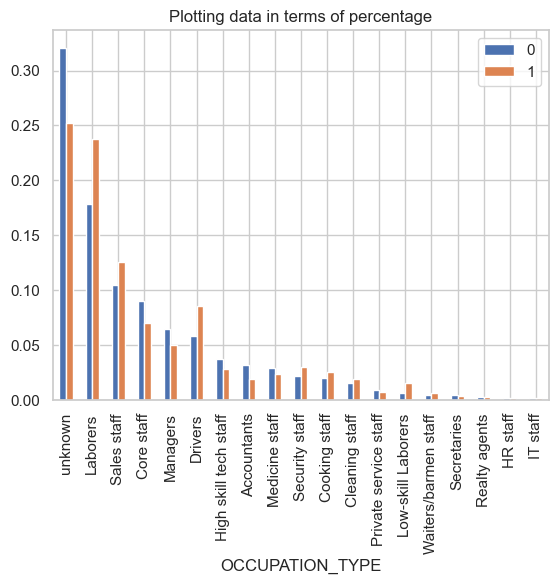

*************** Count Plot for  CNT_FAM_MEMBERS  ***************


<Figure size 200x200 with 0 Axes>

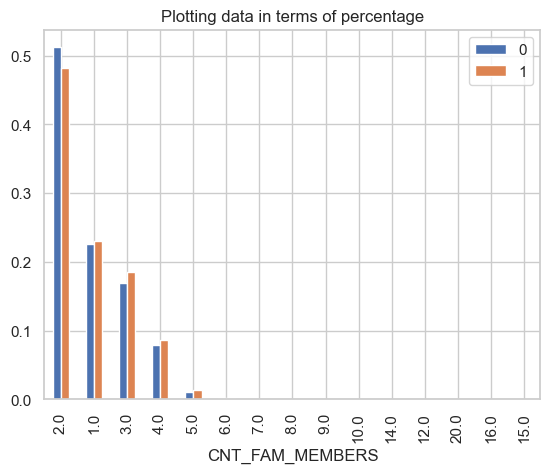

*************** Count Plot for  REGION_RATING_CLIENT  ***************


<Figure size 200x200 with 0 Axes>

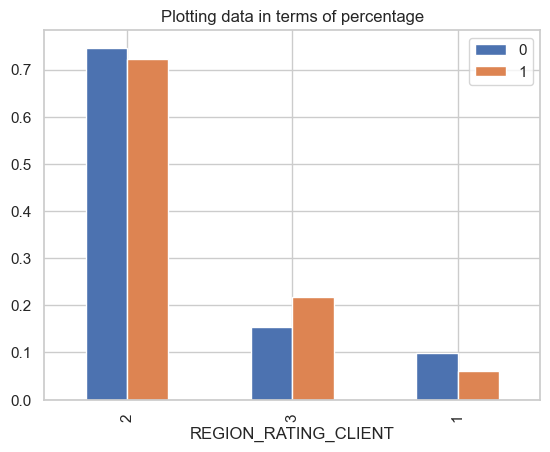

*************** Count Plot for  REGION_RATING_CLIENT_W_CITY  ***************


<Figure size 200x200 with 0 Axes>

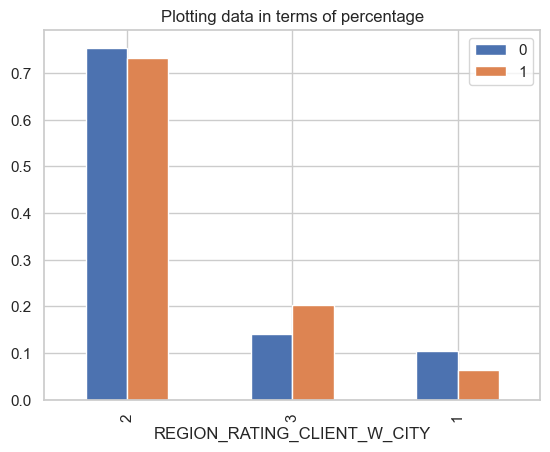

*************** Count Plot for  REG_REGION_NOT_LIVE_REGION  ***************


<Figure size 200x200 with 0 Axes>

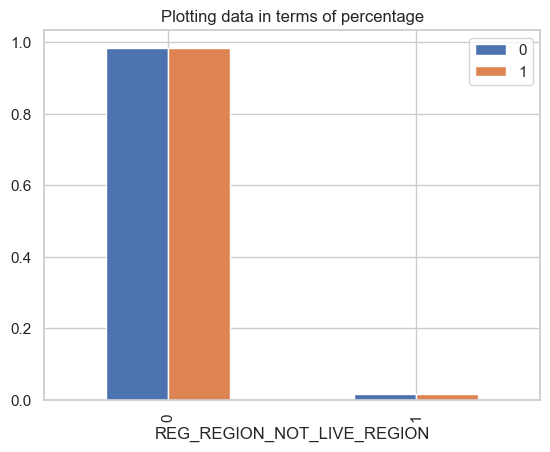

*************** Count Plot for  REG_REGION_NOT_WORK_REGION  ***************


<Figure size 200x200 with 0 Axes>

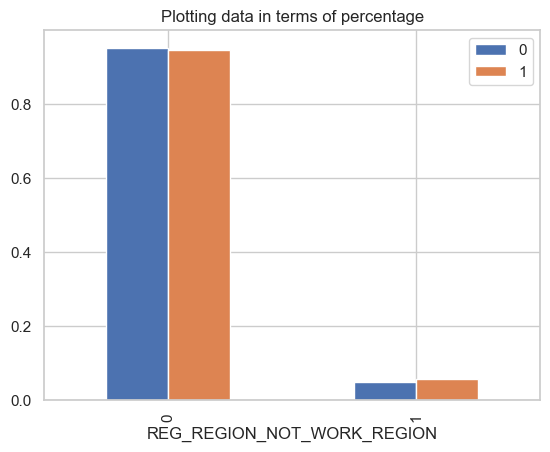

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_HOUR  ***************


<Figure size 200x200 with 0 Axes>

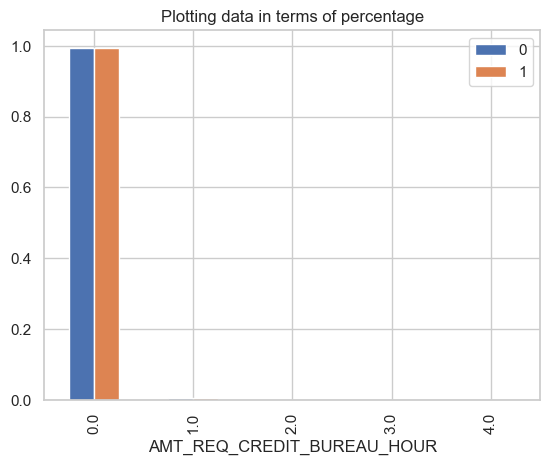

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_DAY  ***************


<Figure size 200x200 with 0 Axes>

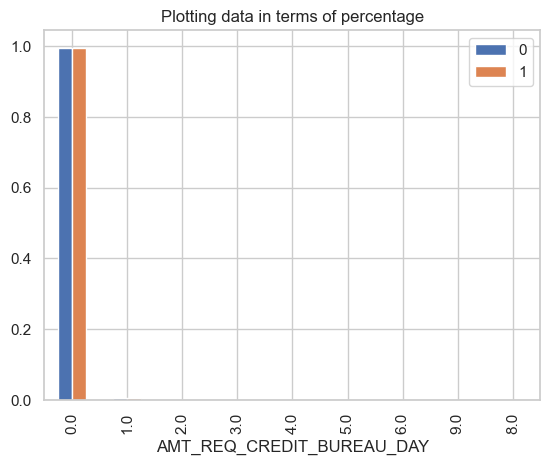

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_WEEK  ***************


<Figure size 200x200 with 0 Axes>

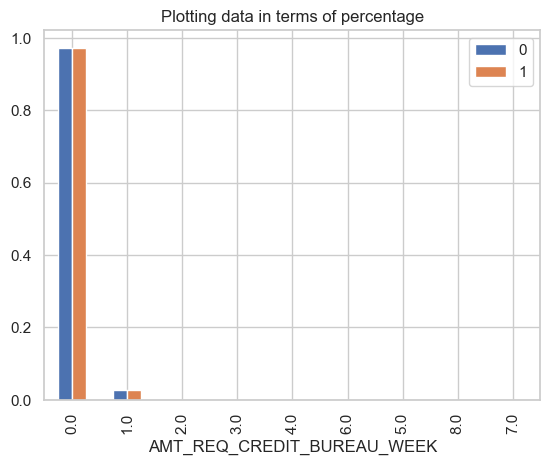

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_MON  ***************


<Figure size 200x200 with 0 Axes>

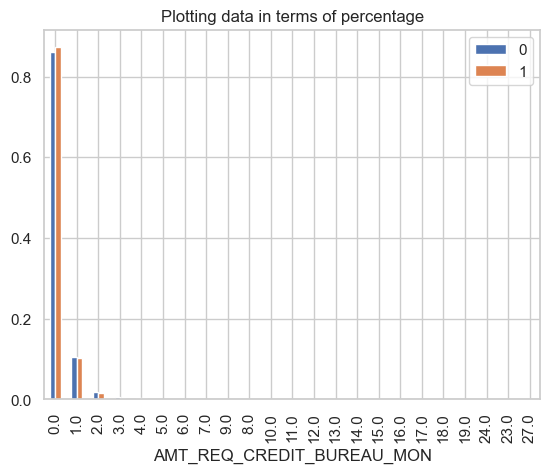

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_QRT  ***************


<Figure size 200x200 with 0 Axes>

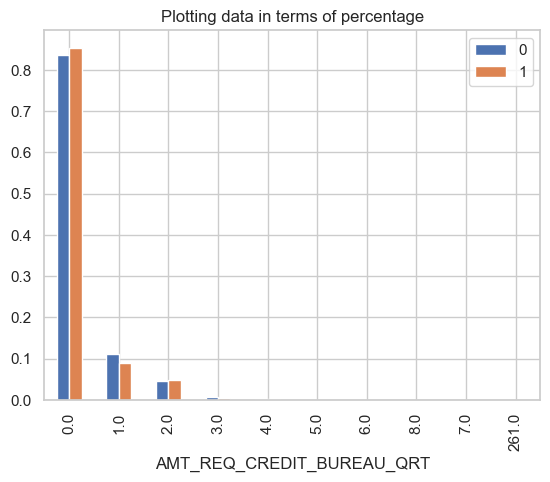

*************** Count Plot for  AMT_REQ_CREDIT_BUREAU_YEAR  ***************


<Figure size 200x200 with 0 Axes>

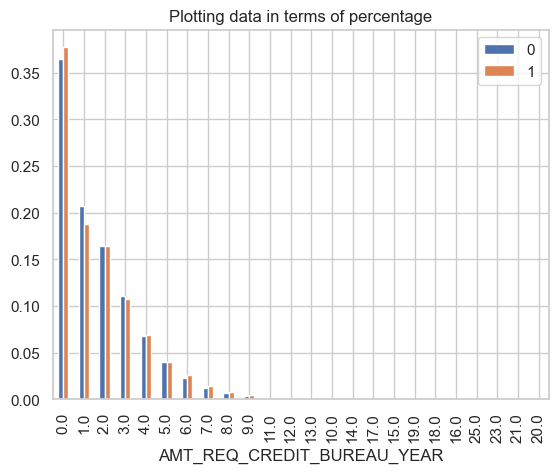

*************** Count Plot for  SALARY_RANGE  ***************


<Figure size 200x200 with 0 Axes>

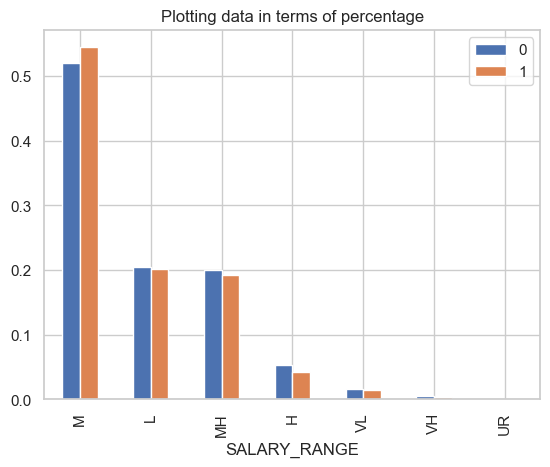

In [470]:
for col in df1_cat_cols:
    plot_bar_func(df_application_data,col)

#### **********  Analysis 

###### NAME_CONTRACT_TYPE
    - Cash loans applicants has the greater % of defaulters than to Revolving loans
###### CODE_GENDER
    - Even sample dataset has the highest population of female applicants though the % of defaulters is higher in Males
###### FLAG_OWN_CAR
    - It is found that applicants who doesnt own a car has the higher % of defaulters
###### FLAG_OWN_REALTY
    - Applicants who does not own any realty has the higher percentage of loan defaulters
###### CNT_CHILDREN
    - Applicants who does not have any kids has lowest percentage of loan defaulters
    - Whereas who has 1 child has the highest % of loan defaulters
###### NAME_EDUCATION_TYPE
    - Secondary/Secondary special applicants has the highest rate of loan defaulters
    - Higher edication applicants are the safe bet and has lowest % of loan defaulters
###### OCCUPATION_TYPE
    - Unknown group has the highest percentage of loan defaulters 
    - But we can not analyse those data as we are not sure of Occupation type of the applicants hence it is better to skip the OCCUPATION_TYPE


#### Univariate Analysis and Outliers for Numerical columns

In [471]:
df_application_data.YEAR_EMPLOYED.mean()

6.966526398979536

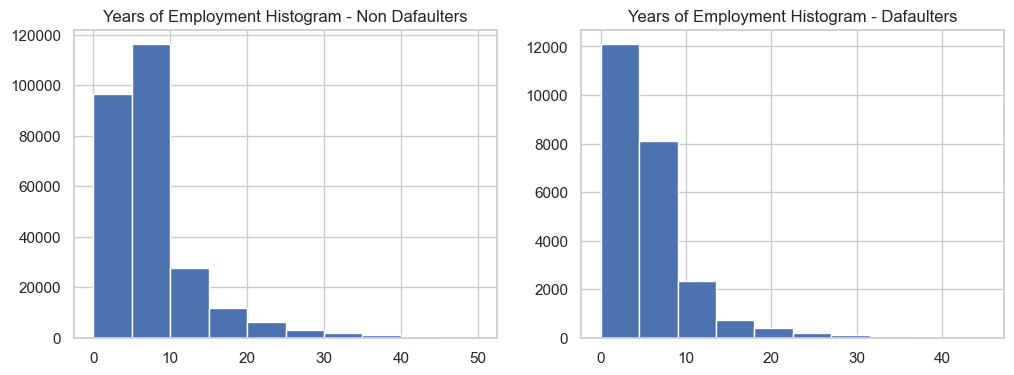

In [472]:
#### Plotting the data to see the Years of Employment for Dafaulters and NonDefaulters
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.title("Years of Employment Histogram - Non Dafaulters")
plt.hist(x=target_0.YEAR_EMPLOYED);
plt.subplot(1,2,2)
plt.title("Years of Employment Histogram - Dafaulters")
plt.hist(x=target_1.YEAR_EMPLOYED);
plt.show()

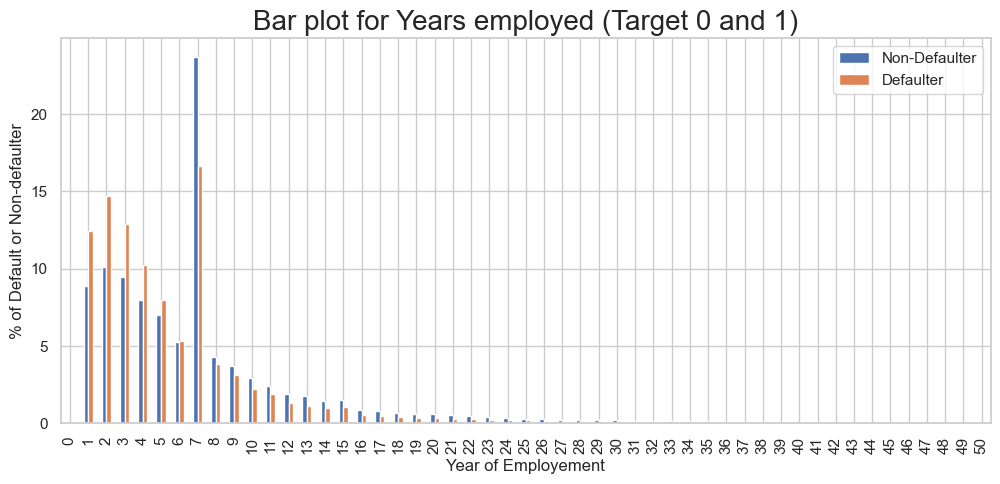

In [473]:
df_YearsEmployed=pd.DataFrame()
df_YearsEmployed['0'] = ((target_0['YEAR_EMPLOYED'].value_counts().sort_index())/len(target_0)*100)
df_YearsEmployed['1'] = ((target_1['YEAR_EMPLOYED'].value_counts().sort_index())/len(target_1)*100)
lines = df_YearsEmployed.plot(kind='bar',figsize=(12,5))
plt.title('Bar plot for Years employed (Target 0 and 1)', fontdict={'fontsize':20})
plt.xticks(rotation=90)
plt.xlabel('Year of Employement')
plt.ylabel('% of Default or Non-defaulter')
plt.legend(['Non-Defaulter', 'Defaulter'])
plt.show()

#### ************** Analysis
    - During the initial phase of employment people tends to have higher tendency to apply loan
    - 0-5 years employeed peoeple has the highest defaulter distribution
    - With high employed years peoeple has more stability and for that reason both applicants distribution and defaulter distribution is low 

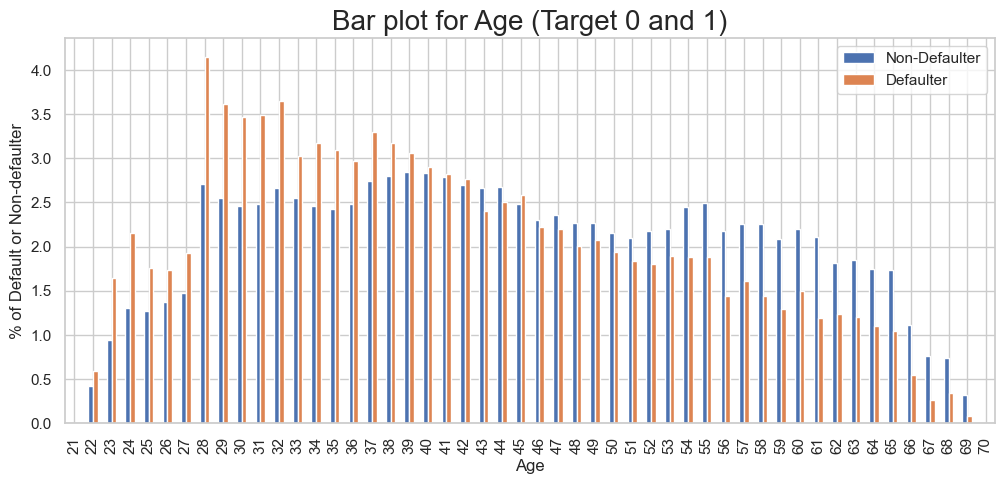

In [474]:
df_YearsEmployed=pd.DataFrame()
df_YearsEmployed['0'] = ((target_0['AGE'].value_counts().sort_index())/len(target_0)*100)
df_YearsEmployed['1'] = ((target_1['AGE'].value_counts().sort_index())/len(target_1)*100)
lines = df_YearsEmployed.plot(kind='bar',figsize=(12,5))
plt.title('Bar plot for Age (Target 0 and 1)', fontdict={'fontsize':20})
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('% of Default or Non-defaulter')
plt.legend(['Non-Defaulter', 'Defaulter'])
plt.show()

1. 28-43 age group has the highest rate of defaulters due to less financial stability
2. Old people has the better financial stablity and hence defaulter rate is much less

#### Bivariate Analysis

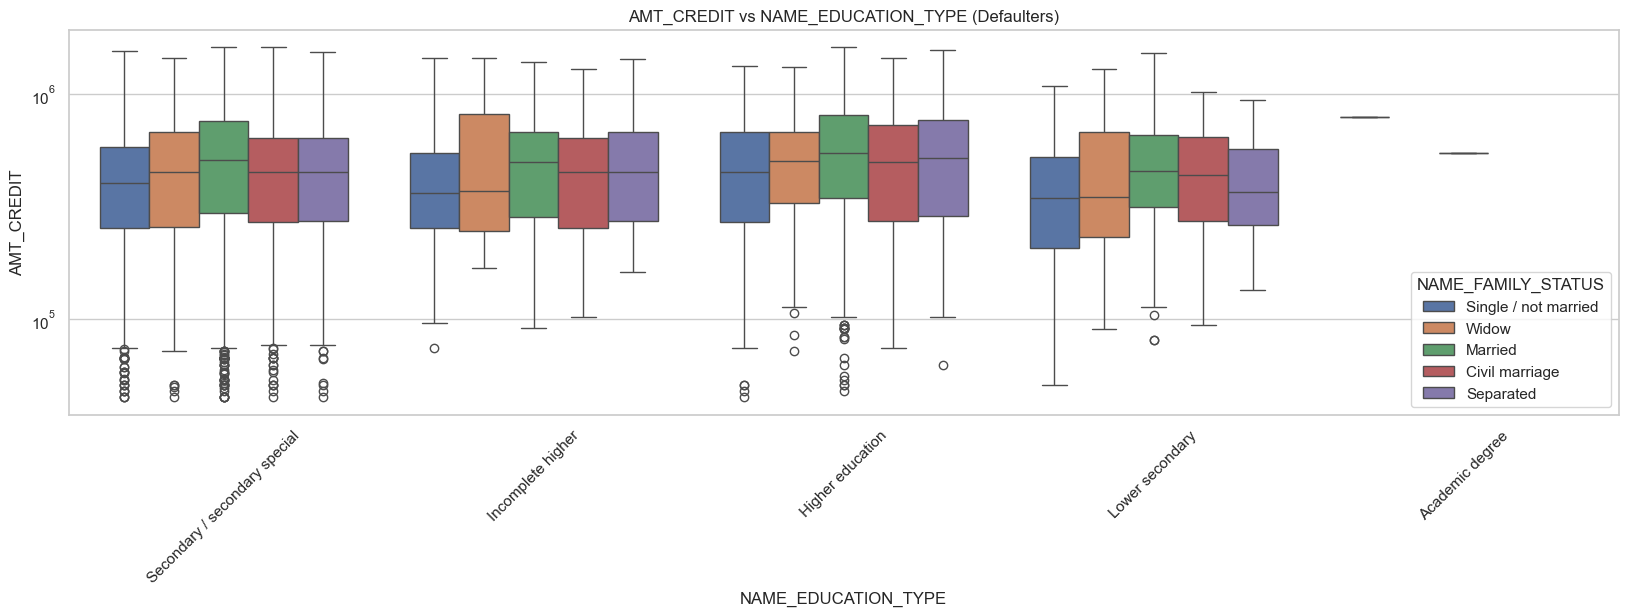

In [475]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_CREDIT vs NAME_EDUCATION_TYPE (Defaulters)')
plt.show()

#### *************** Analysis

1. Secondary/Secondary Special and Higher education have the most numbers of outliers
2. Civil marriage and separated has almost equal numbers of Amount Credited where education level is 'Secondary/Secondary Special' and 'Incomplete Higher' for defaulters
3. Married + 'Secondary/Secondary Special' and Widow + Incomplete higher combination has the higest Amount credited.

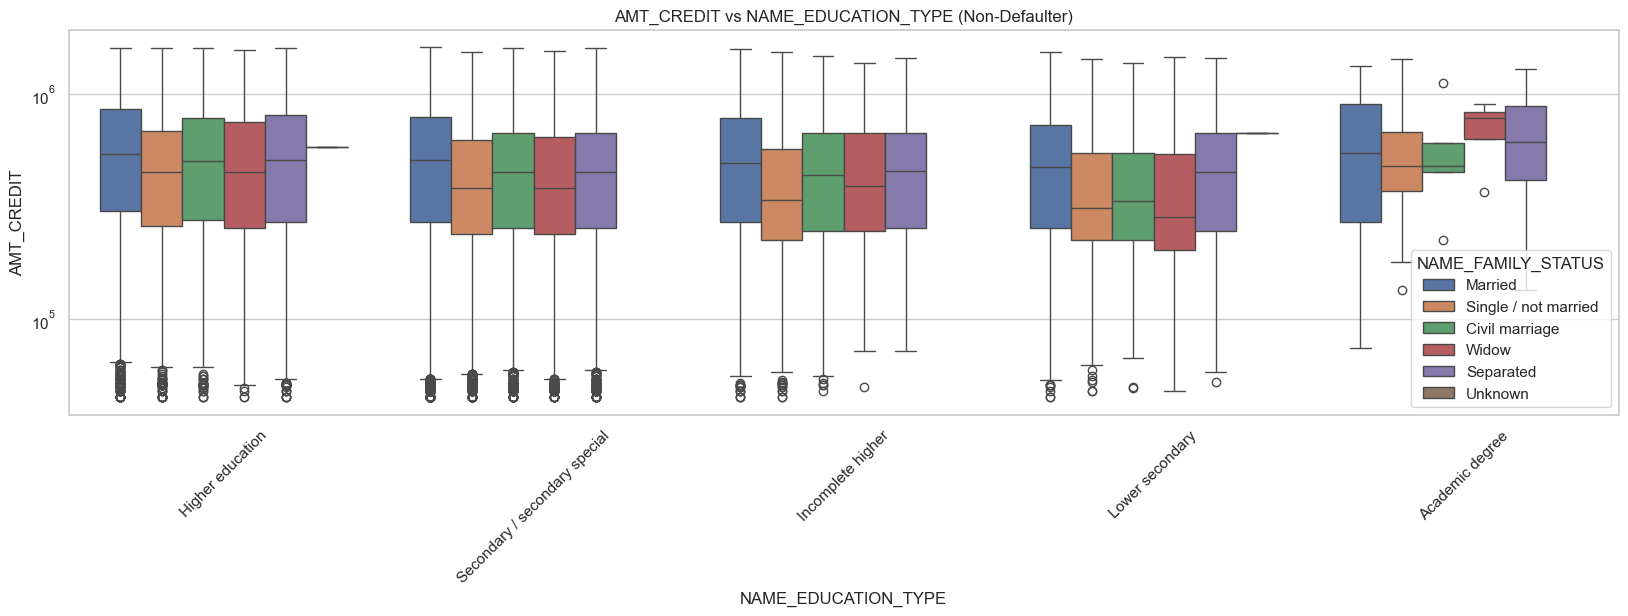

In [476]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_CREDIT vs NAME_EDUCATION_TYPE (Non-Defaulter)')
plt.show()

Text(0.5, 1.0, 'Defaulters')

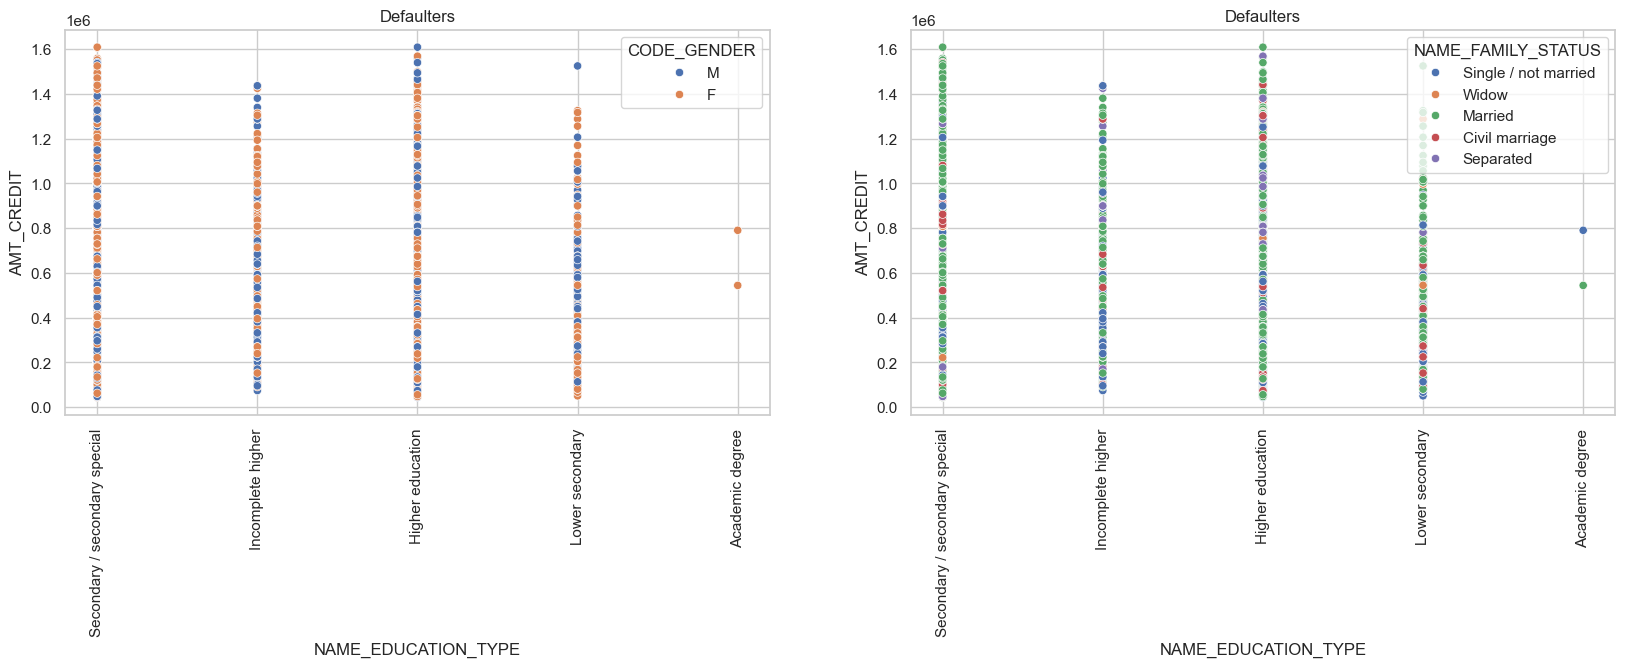

In [477]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='CODE_GENDER', data=target_1)
plt.xticks(rotation=90)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue = 'NAME_FAMILY_STATUS', data=target_1)
plt.xticks(rotation=90)
plt.title('Defaulters')

##### Corelation of relevant numerical columns for defaulters and non defaulters

In [478]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','REGION_RATING_CLIENT']

Correlation of defaulters

In [479]:
# Creating dataframe for numerical columns
df_corr_target_1 = df_application_data[corr_cols]
df_corr_target_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
0          202500.0    406597.5      24700.5         351000.0   26   
1          270000.0   1293502.5      35698.5        1129500.0   46   
2           67500.0    135000.0       6750.0         135000.0   53   
3          135000.0    312682.5      29686.5         297000.0   53   
4          121500.0    513000.0      21865.5         513000.0   55   

   REGION_RATING_CLIENT  
0                     2  
1                     1  
2                     2  
3                     2  
4                     2

<Axes: >

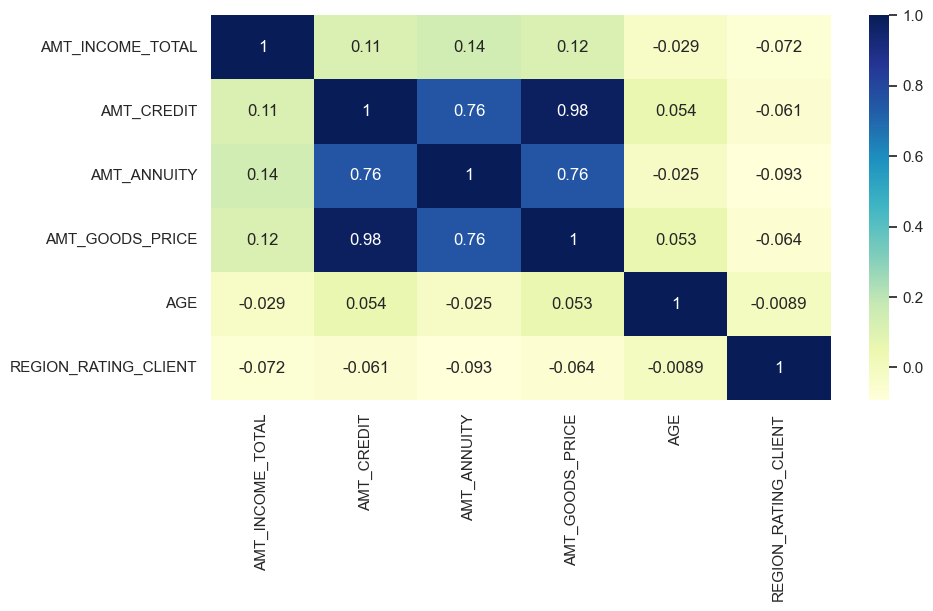

In [480]:
plt.figure(figsize=(10,5))
sns.heatmap(df_corr_target_1.corr(),cmap="YlGnBu",annot=True)

 Highly correlated columns for defaulters applicants
   <br> - AMT_CREDIT and AMT_GOODS_PRICE (0.98)
   <br> - AMT_ANNUITY and AMT_GOODS_PRICE (0.76)
   <br> - AMT_CREDIT and AMT_ANNUITY (0.76)

Correlation of Non-defaulters

In [481]:
# Creating dataframe for numerical columns
df_corr_target_0 = df_application_data[corr_cols]
df_corr_target_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
0          202500.0    406597.5      24700.5         351000.0   26   
1          270000.0   1293502.5      35698.5        1129500.0   46   
2           67500.0    135000.0       6750.0         135000.0   53   
3          135000.0    312682.5      29686.5         297000.0   53   
4          121500.0    513000.0      21865.5         513000.0   55   

   REGION_RATING_CLIENT  
0                     2  
1                     1  
2                     2  
3                     2  
4                     2

In [482]:
# correlation
df_corr_target_0.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL              1.000000    0.113647     0.143175   
AMT_CREDIT                    0.113647    1.000000     0.756356   
AMT_ANNUITY                   0.143175    0.756356     1.000000   
AMT_GOODS_PRICE               0.115389    0.981537     0.756437   
AGE                          -0.029217    0.053811    -0.024642   
REGION_RATING_CLIENT         -0.071911   -0.060985    -0.093358   

                      AMT_GOODS_PRICE       AGE  REGION_RATING_CLIENT  
AMT_INCOME_TOTAL             0.115389 -0.029217             -0.071911  
AMT_CREDIT                   0.981537  0.053811             -0.060985  
AMT_ANNUITY                  0.756437 -0.024642             -0.093358  
AMT_GOODS_PRICE              1.000000  0.052508             -0.063723  
AGE                          0.052508  1.000000             -0.008872  
REGION_RATING_CLIENT        -0.063723 -0.008872              1.000000

<Axes: >

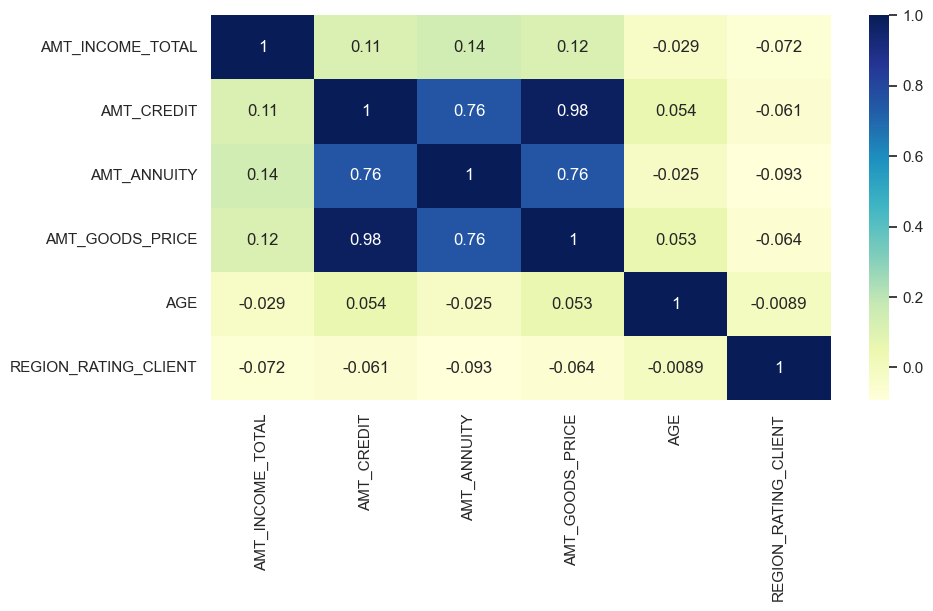

In [483]:
plt.figure(figsize=(10,5))
sns.heatmap(df_corr_target_0.corr(),cmap="YlGnBu",annot=True)

Highly correlated columns for defaulters applicants
- AMT_CREDIT and AMT_GOODS_PRICE (0.98)
- AMT_ANNUITY and AMT_GOODS_PRICE (0.76)
- AMT_CREDIT and AMT_ANNUITY (0.76)

#### Load the data for Previous applcaition

In [484]:
df_prev_application_data = pd.read_csv('previous_application.csv')

In [486]:
df_prev_application_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [487]:
df_prev_application_data.shape

(1670214, 37)

In [488]:
# Types of column attached to the data frame
df_prev_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [489]:
df_prev_application_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

##### Clean the unnecessary columns from the dataframe

In [490]:
df_prev_application_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [491]:
cols_irrelevent = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START','DAYS_FIRST_DUE','DAYS_LAST_DUE']

In [492]:
df_prev_application_data.shape

(1670214, 37)

In [493]:
df_prev_application_data.drop(cols_irrelevent,axis=1,inplace=True)

In [494]:
df_prev_application_data.shape

(1670214, 31)

In [496]:
# check for the null values
(df_prev_application_data.isnull().mean()*100).sort_values(ascending=False)

RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_TERMINATION             40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_PRODUCT_TYPE             0.000000
NAME_YIELD_GROUP              0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
CHANNEL_TYPE                  0.000000
SK_ID_PREV                    0.000000
NAME_PORTFOLIO                0.000000
NAME_GOODS_CATEGORY           0.000000
NAME_CLIENT_TYPE              0.000000
SK_ID_CURR                    0.000000
NAME_PAYMENT_TYPE             0.000000
DAYS_DECISION            

In [497]:
cut_off =40
drop_cols_high_missing_val = []

for column in df_prev_application_data.columns:
    if df_prev_application_data[column].isnull().mean()*100 >=cut_off:
        drop_cols_high_missing_val.append(column)

drop_cols_high_missing_val

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [498]:
# drop higher missing value columns
df_prev_application_data.drop(drop_cols_high_missing_val,axis=1,inplace=True)

In [499]:
df_prev_application_data.shape

(1670214, 22)

#### Segregation of categorical and numerical columns

In [500]:
cat_cols = []
num_cols = []

for column in df_prev_application_data.columns:
    if df_prev_application_data[column].nunique()>30:
        num_cols.append(column)
    else:
        cat_cols.append(column)
    

In [501]:
# list of categorical columns
cat_cols

['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [502]:
# numerical columns
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

#### Handle the null values in different columns

In [503]:
#Check null values in categorical columns
for col in cat_cols:
    if df_prev_application_data[col].isnull().mean()*100 != 0:
        mode=df_prev_application_data[col].mode()[0]
        df_prev_application_data[col]=df_prev_application_data[col].fillna(mode)

In [504]:
#Check null values in Numerical columns
for col in num_cols:
    if df_prev_application_data[col].isnull().mean()*100 > 0:
        med=df_prev_application_data[col].median()
        df_prev_application_data[col]=df_prev_application_data[col].fillna(med)

In [505]:
(df_prev_application_data.isnull().mean()*100).sort_values(ascending=False)

SK_ID_PREV                0.0
SK_ID_CURR                0.0
NAME_YIELD_GROUP          0.0
CNT_PAYMENT               0.0
NAME_SELLER_INDUSTRY      0.0
SELLERPLACE_AREA          0.0
CHANNEL_TYPE              0.0
NAME_PRODUCT_TYPE         0.0
NAME_PORTFOLIO            0.0
NAME_GOODS_CATEGORY       0.0
NAME_CLIENT_TYPE          0.0
CODE_REJECT_REASON        0.0
NAME_PAYMENT_TYPE         0.0
DAYS_DECISION             0.0
NAME_CONTRACT_STATUS      0.0
NAME_CASH_LOAN_PURPOSE    0.0
AMT_GOODS_PRICE           0.0
AMT_CREDIT                0.0
AMT_APPLICATION           0.0
AMT_ANNUITY               0.0
NAME_CONTRACT_TYPE        0.0
PRODUCT_COMBINATION       0.0
dtype: float64

In [506]:
df_prev_application_data.NAME_CLIENT_TYPE.value_counts()

NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: count, dtype: int64

In [507]:
#remove XNA
df_prev_application_data = df_prev_application_data[~(df_prev_application_data.NAME_CLIENT_TYPE == 'XNA')]

In [508]:
df_prev_application_data.NAME_CLIENT_TYPE.value_counts()

NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
Name: count, dtype: int64

#### Merging two datasets

##### 'SK_ID_CURR' is the common column in both the datasets
 ###### lets analyze the 'SK_ID_CURR' column before merging

In [509]:
df_application_data.SK_ID_CURR.value_counts().head()

SK_ID_CURR
100002    1
337766    1
337773    1
337772    1
337771    1
Name: count, dtype: int64

In [510]:
df_prev_application_data.SK_ID_CURR.value_counts().head()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
Name: count, dtype: int64

<Axes: xlabel='NAME_CONTRACT_STATUS'>

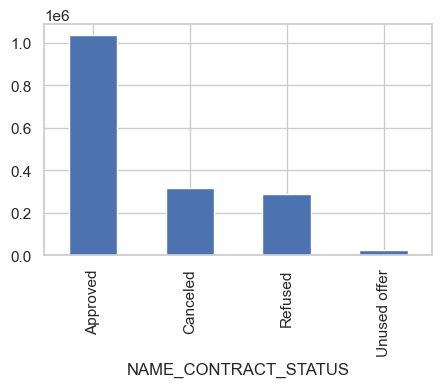

In [512]:
##### Knowing the % of columns that are approved,refused,cancelled
df_prev_application_data.groupby('NAME_CONTRACT_STATUS')['SK_ID_PREV'].count().plot(kind='bar',figsize=(5,3))

In [513]:
# Merge the datasets
complete_data = pd.merge(left=df_application_data, right=df_prev_application_data,how='inner', on='SK_ID_CURR')

In [514]:
complete_data.shape

(1335273, 57)

<Axes: xlabel='NAME_CONTRACT_STATUS'>

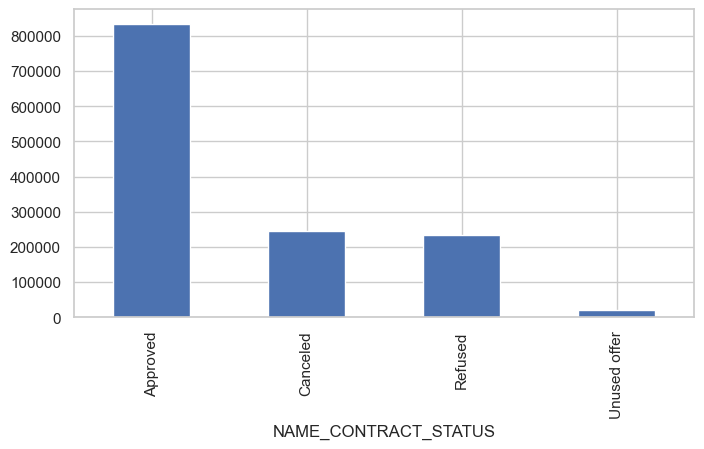

In [515]:
# Knowing the count of approved,refused,cancelled
complete_data.groupby('NAME_CONTRACT_STATUS')['SK_ID_CURR'].count().plot(kind='bar',figsize=(8,4))

[Text(0.5, 0, 'Loan status')]

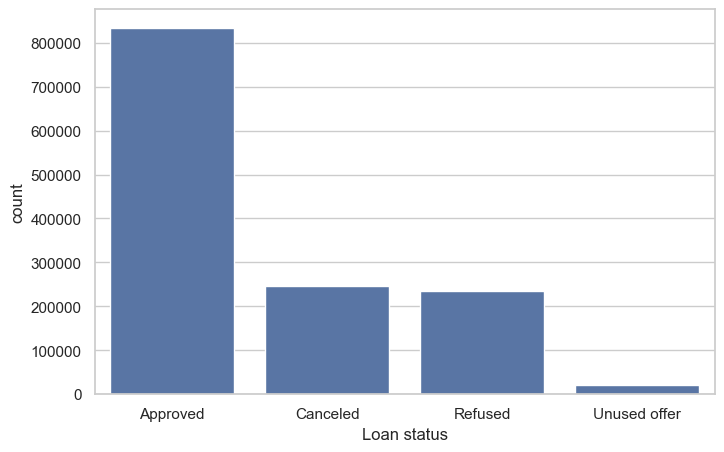

In [516]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=complete_data)
ax.set(xlabel='Loan status')

[Text(0.5, 0, 'Client type')]

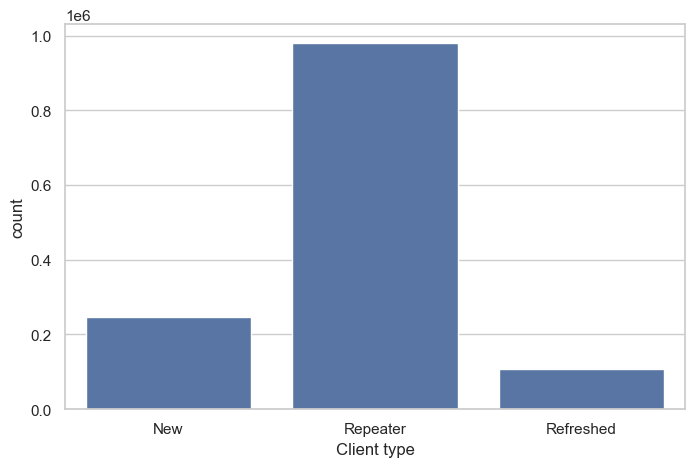

In [517]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=complete_data)
ax.set(xlabel='Client type')

In [518]:
# creaing speparate dataframes for different loan status type
#### Dividing the data based on the Contract Status:
data_approved = complete_data[complete_data['NAME_CONTRACT_STATUS'] == 'Approved']
data_canceled = complete_data[complete_data['NAME_CONTRACT_STATUS'] == 'Canceled']
data_refused = complete_data[complete_data['NAME_CONTRACT_STATUS'] == 'Refused']
data_unused = complete_data[complete_data['NAME_CONTRACT_STATUS'] == 'Unused offer']

In [519]:
def plot_complete_data_func(dataframe,col_name):
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.subplot(221)
    dataframe[col_name].value_counts().plot.pie(autopct = "%1.0f%%" , ax = ax1)
    plt.title("Plotting data for the dimension " + col_name)
    ax2 = plt.subplot(222)
    sns.countplot(x=col_name,hue='NAME_CONTRACT_STATUS',data=dataframe,ax=ax2)
    plt.xticks(rotation=90)
    plt.title("Plotting data for target in terms of total count")
    ax3 = plt.subplot(223)
    dfStatus=pd.DataFrame()
    dfStatus['Approved'] = ((data_approved[col_name].value_counts())/len(data_approved))
    dfStatus['Canceled'] = ((data_canceled[col_name].value_counts())/len(data_canceled))
    dfStatus['Refused'] = ((data_refused[col_name].value_counts())/len(data_refused))
    dfStatus['Unused'] = ((data_unused[col_name].value_counts())/len(data_unused))
    dfStatus.plot.bar(ax=ax3)
    plt.title("plotting data in terms of percentage")
    fig.tight_layout()
    plt.show()

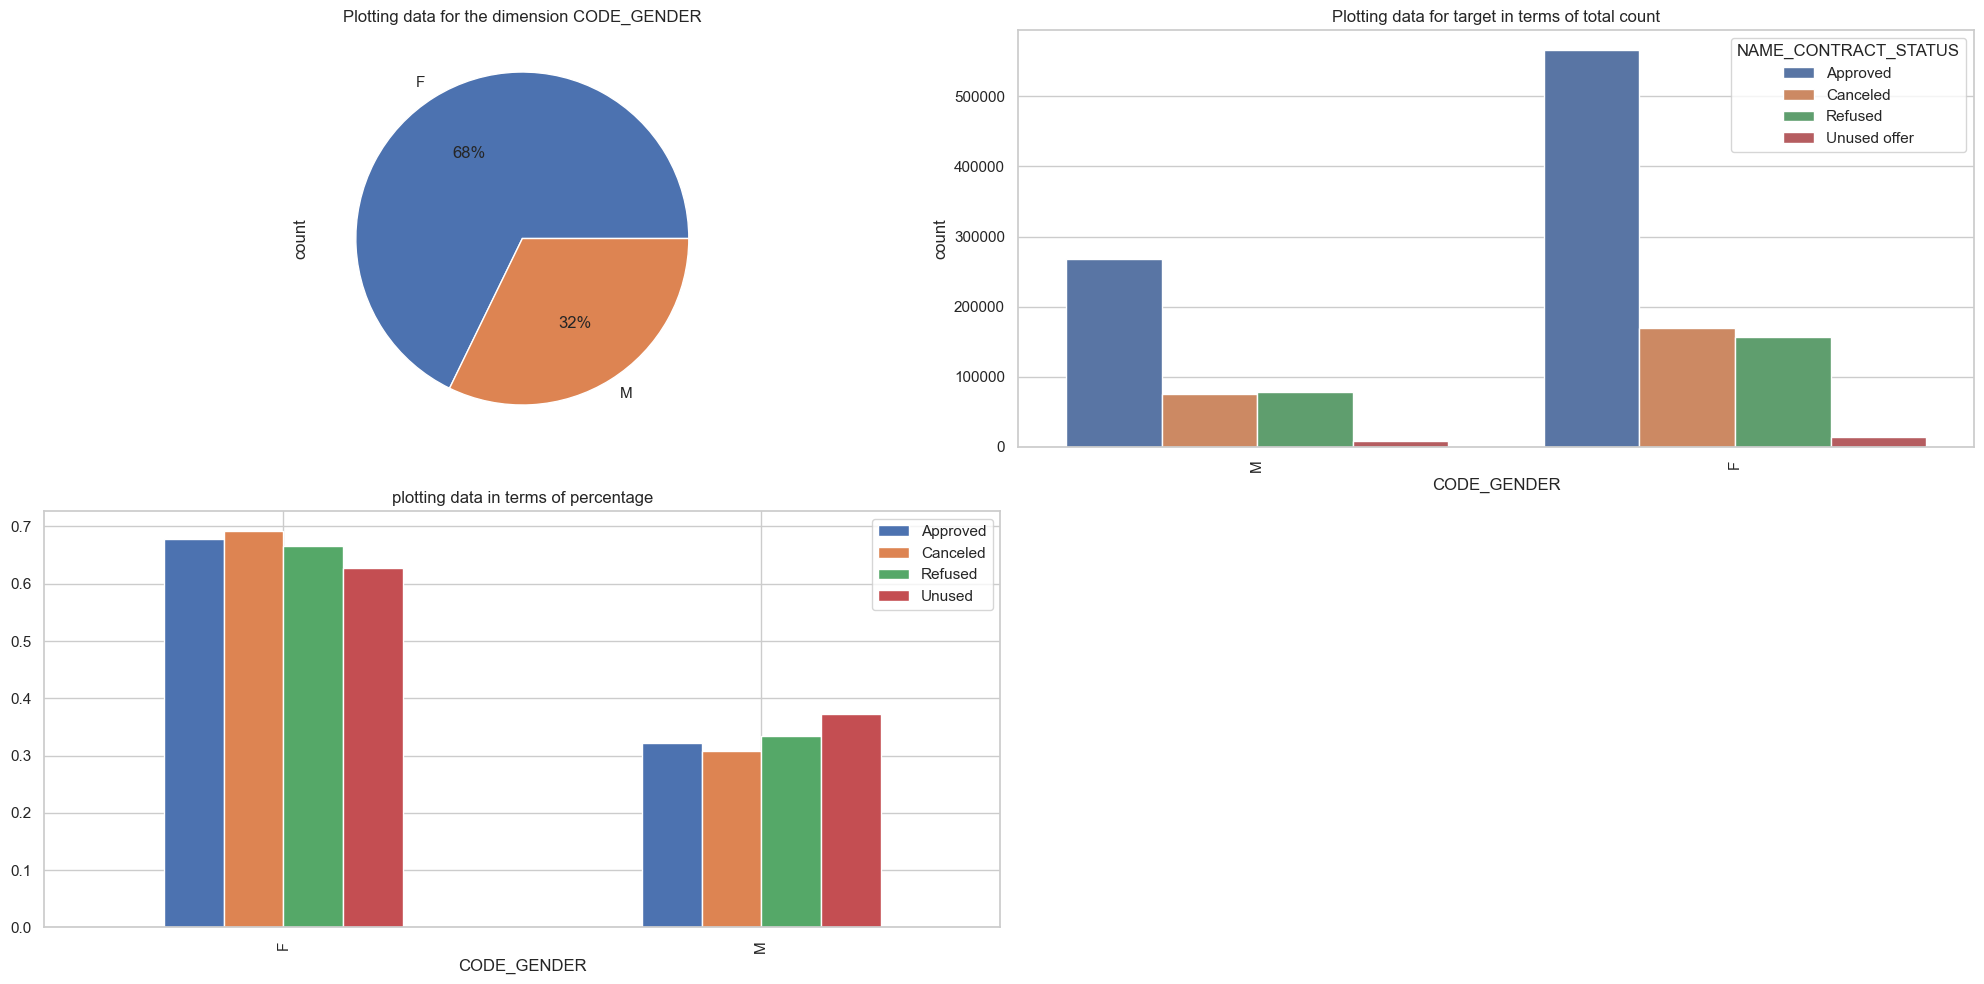

In [520]:
plot_complete_data_func(complete_data,'CODE_GENDER')

##### ******* Analysis

Sample has the most numbers of Female applicants hence in all cases such as Approved, Cancelled, Refused and Unused, Female has the higher rate compared to male applicants

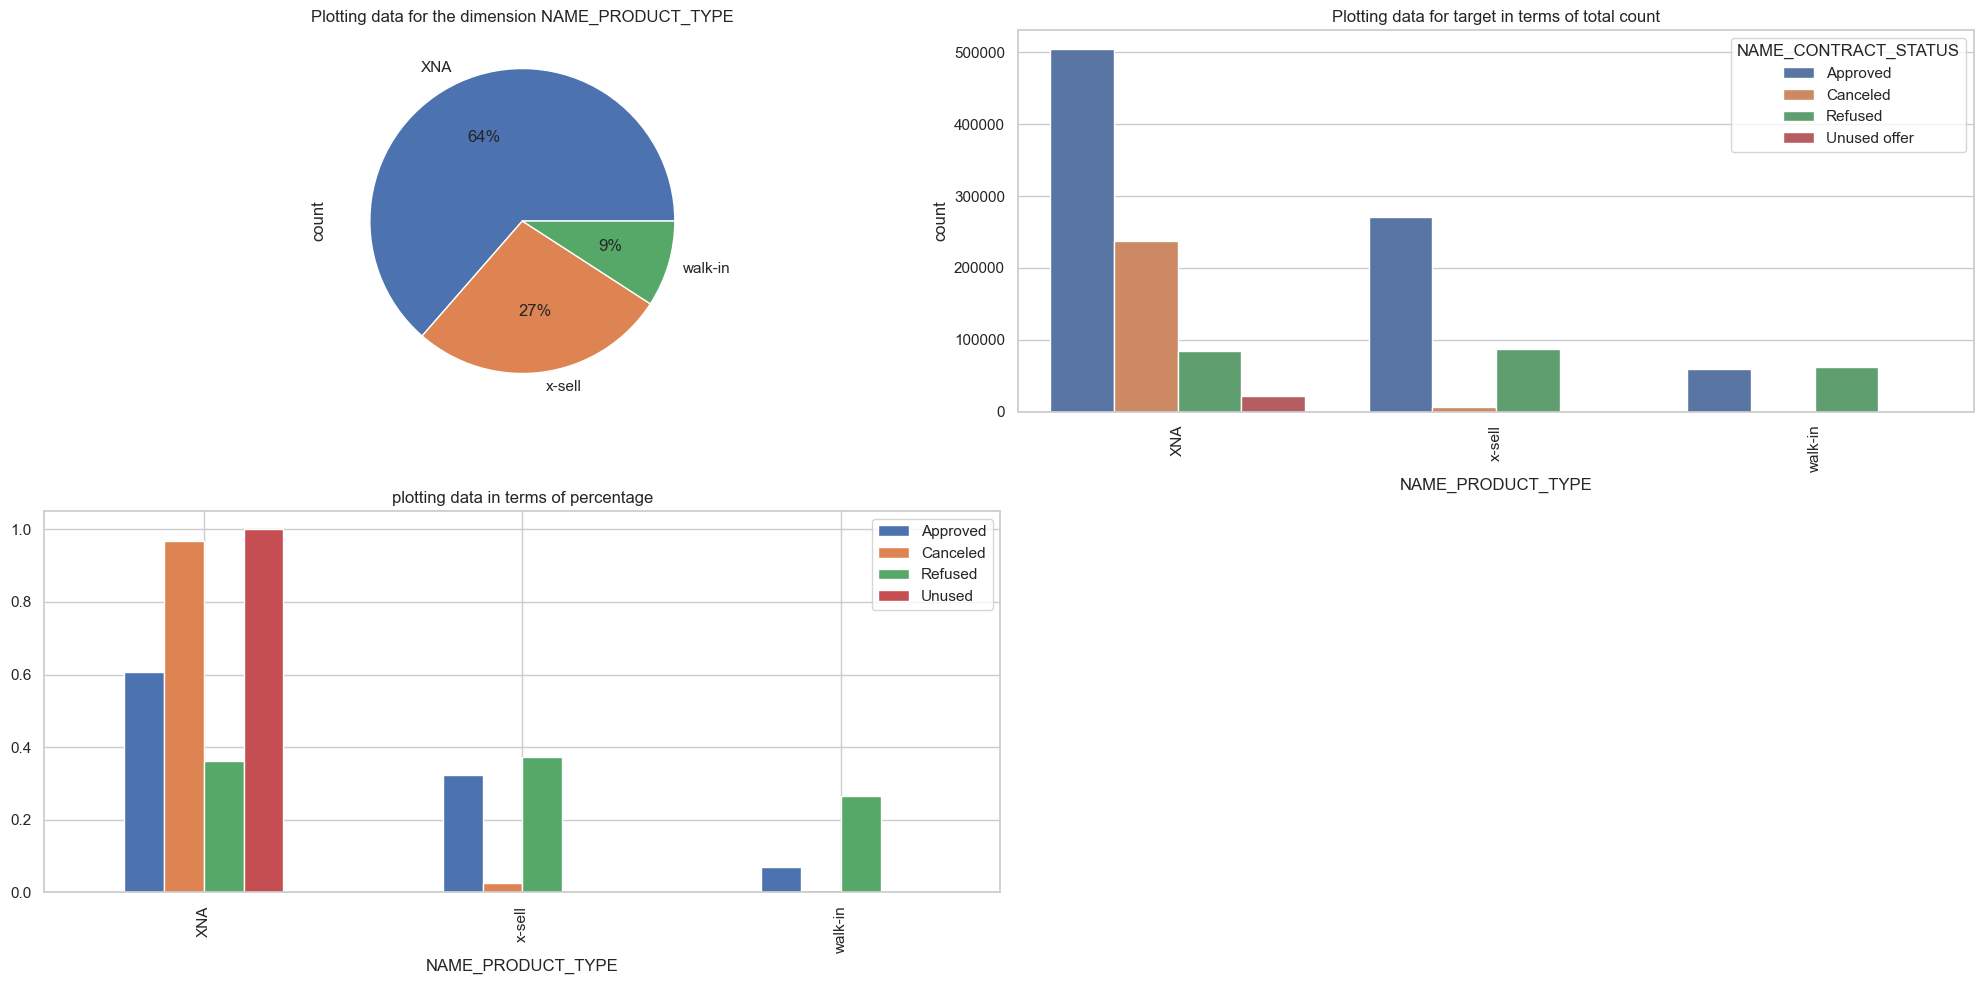

In [521]:
plot_complete_data_func(complete_data,'NAME_PRODUCT_TYPE')

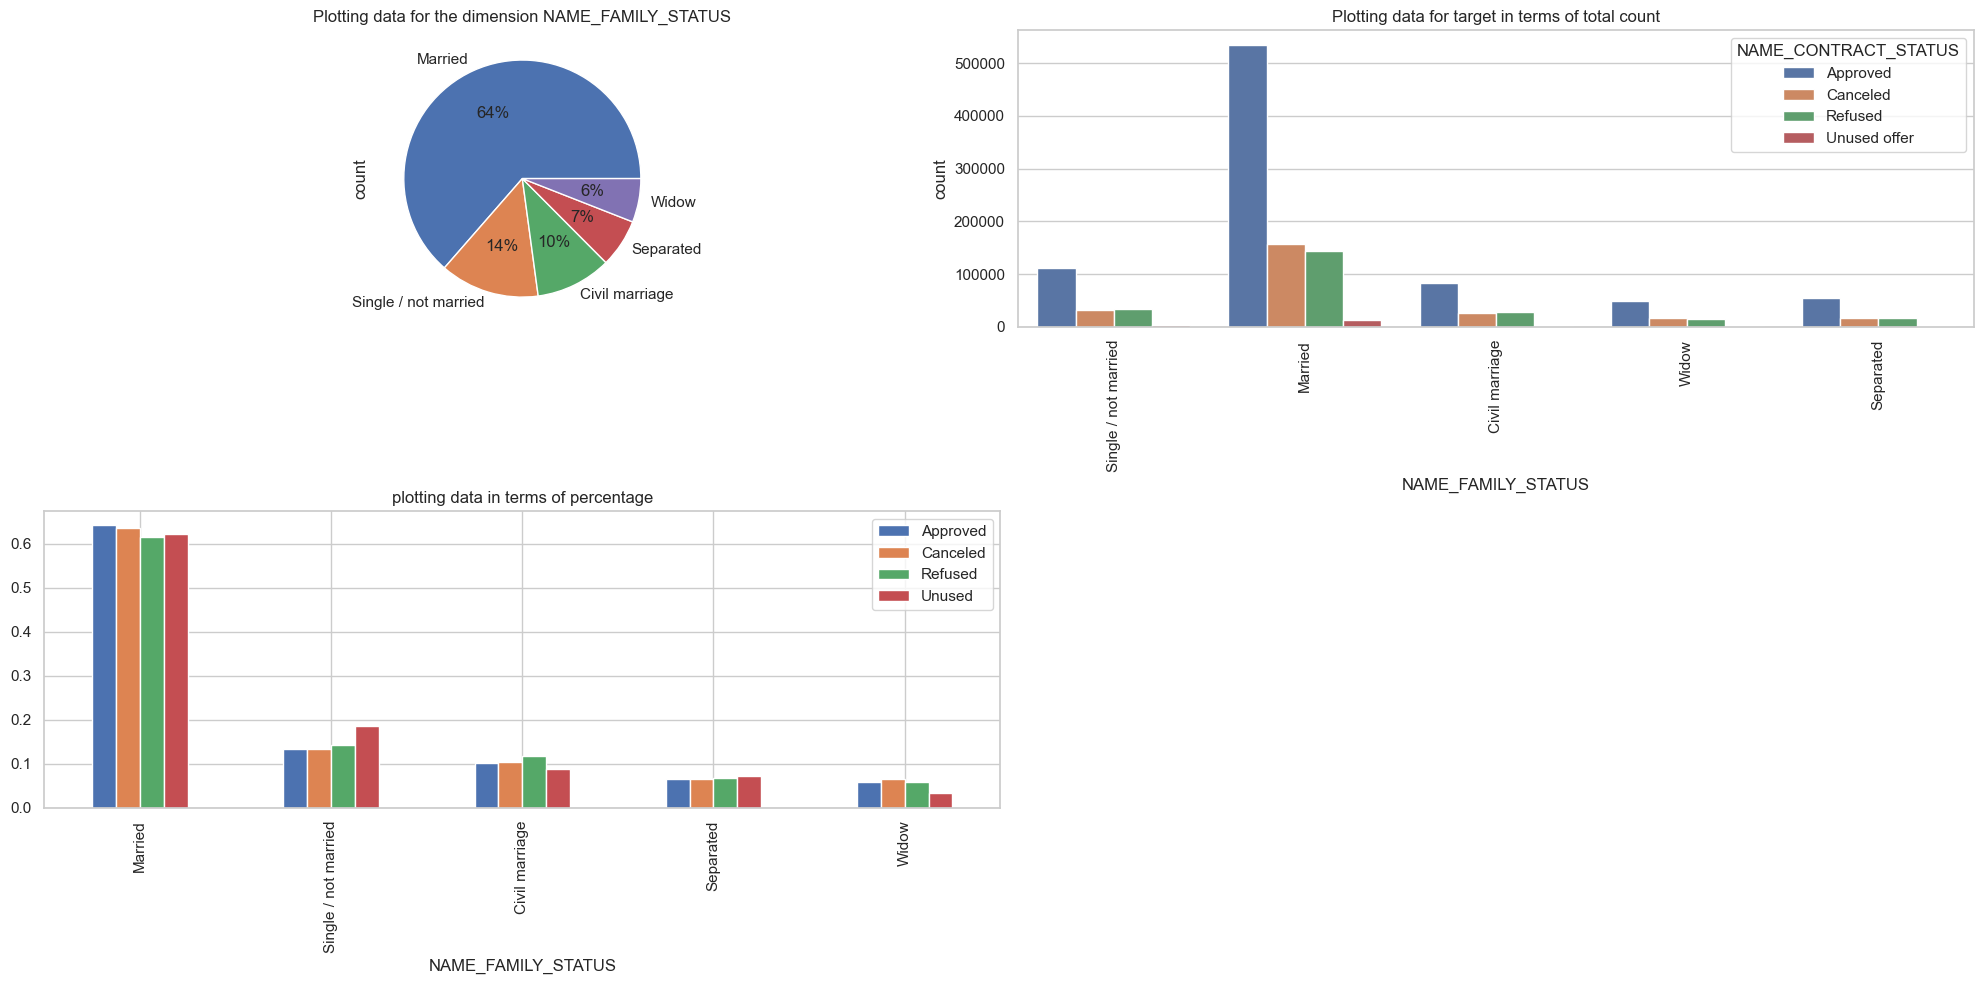

In [522]:
plot_complete_data_func(complete_data,'NAME_FAMILY_STATUS')

#### ****** Analysis

1. Married peoples has the dominance in all categories
2. Single/ not married people has the highest % in unused category
3. Civil and single/not married people have the highest %rate of refused loan compared to others

In [523]:
complete_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'SALARY_RANGE', 'AGE', 'AGE_GROUP',
       'YEAR_EMPLOYED', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'NAME_CASH_LOAN_PURPOSE',

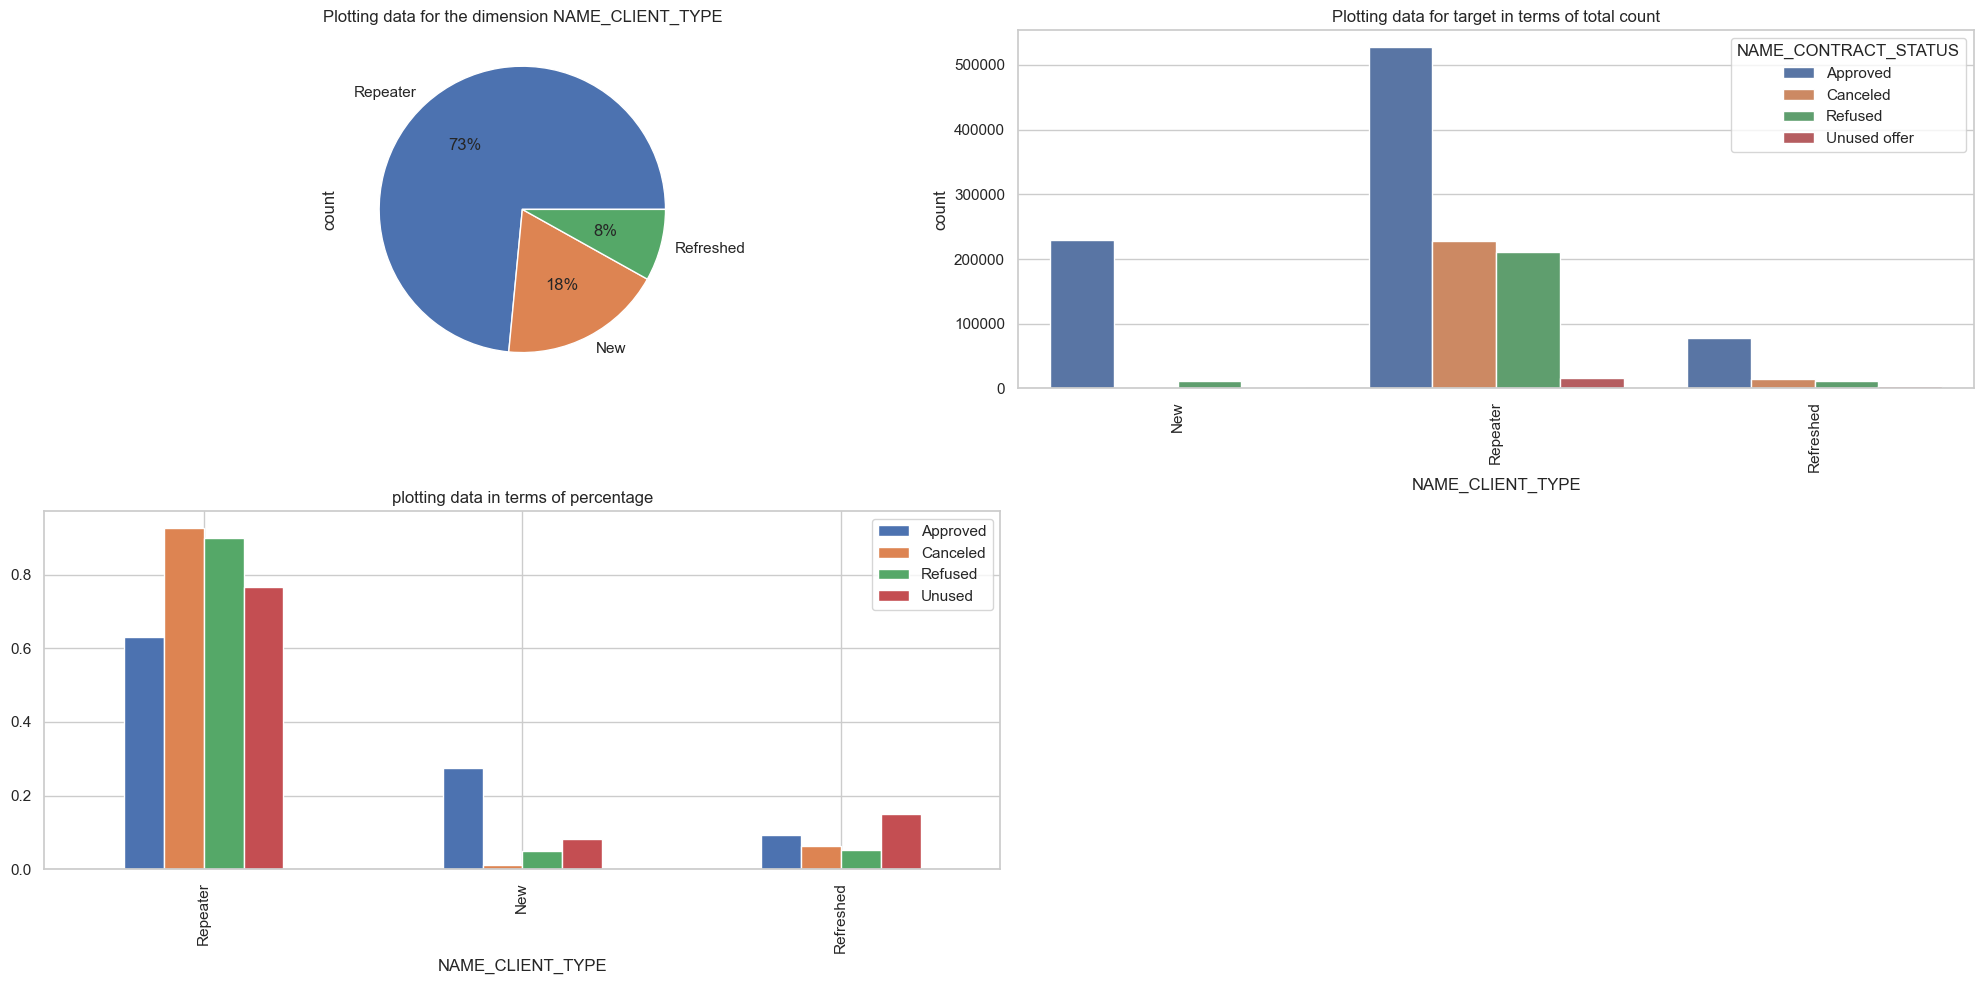

In [524]:
plot_complete_data_func(complete_data,'NAME_CLIENT_TYPE')

##### ****** Analysis

1. Loan Repeater has the dominance in the loan application
2. Repeater has the highest % of Refused and cancelled rate.
3. Refreshed has the highest rate of unused if we consider the numbers of applications for each category
4. New has the highest rate of approval if we consider the numbers of applications for each category

In [525]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT_x','AMT_ANNUITY_x','CNT_PAYMENT','DAYS_DECISION','YEAR_EMPLOYED','CNT_FAM_MEMBERS','DAYS_ID_PUBLISH','AGE']

In [526]:
list(data_approved.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'SALARY_RANGE',
 'AGE',
 'AGE_GROUP',
 'YEAR_EMPLOYED',
 'SK_ID_PREV',
 'NAME_CONTRACT_TYPE_y',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYP

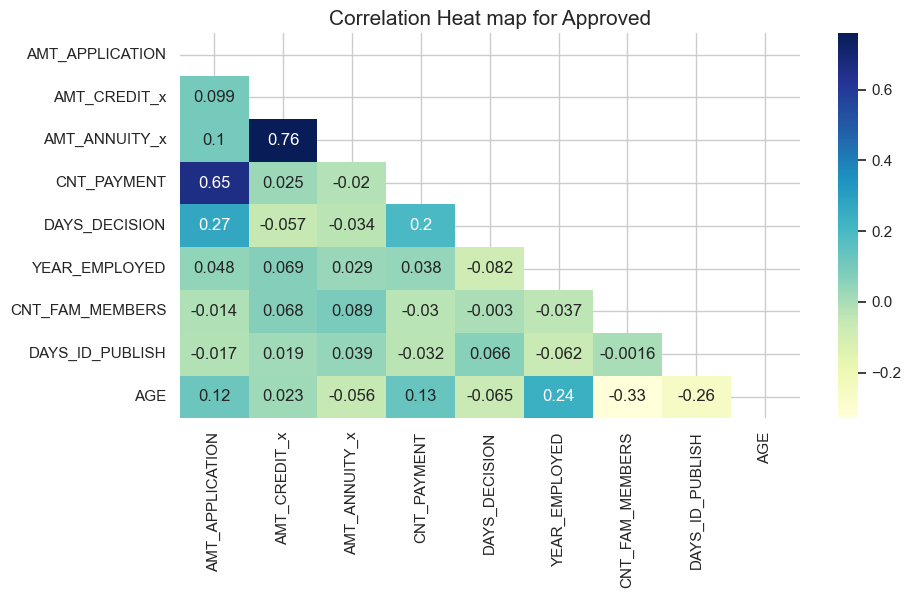

In [527]:
# Correlation Heat map for Approved loans
corr_a = data_approved[corr_cols].corr()
mask_a = np.zeros_like(corr_a)
mask_a[np.triu_indices_from(mask_a)]= True
f, ax = plt.subplots(figsize=(10, 5))
with sns.axes_style('white'):
    ax= sns.heatmap(corr_a, mask=mask_a, cmap="YlGnBu",annot=True)
    plt.title('Correlation Heat map for Approved',fontdict={'fontsize':15})
    plt.show()

Top Correlation in case of approved loans
1. AMT_ANNUITY vs AMT_CREDIT - 0.76
2. CNT_PAYMENT vs AMT_APPLICATION - 0.65
3. DAYS_DESCISION vs AMT_APPLICATION - 0.27

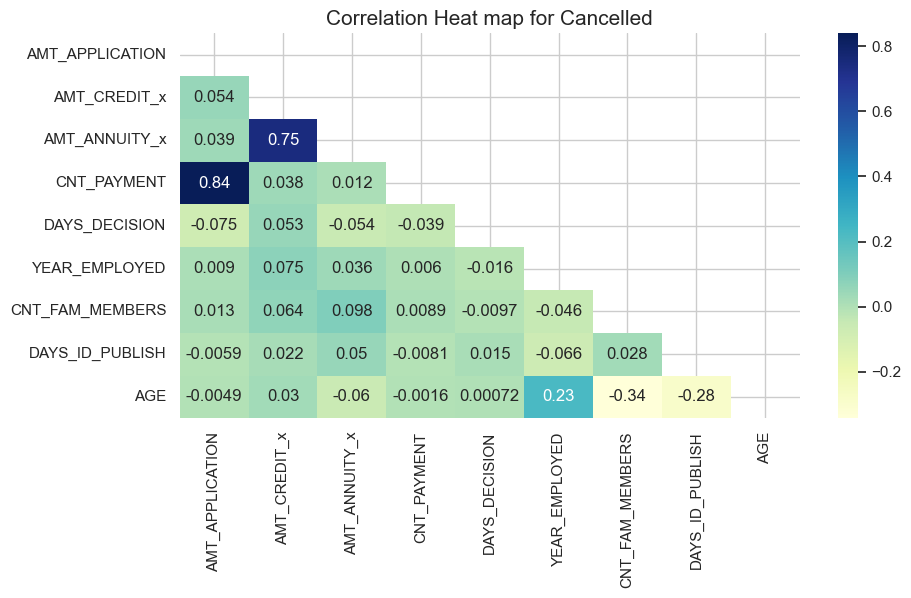

In [528]:
# Correlation Heat map for CANCELLED loans
corr_a = data_canceled[corr_cols].corr()
mask_a = np.zeros_like(corr_a)
mask_a[np.triu_indices_from(mask_a)]= True
f, ax = plt.subplots(figsize=(10, 5))
with sns.axes_style('white'):
    ax= sns.heatmap(corr_a, mask=mask_a, cmap="YlGnBu",annot=True)
    plt.title('Correlation Heat map for Cancelled',fontdict={'fontsize':15})
    plt.show()

Top Correlation in case of Cancelled loans
1. AMT_ANNUITY vs AMT_CREDIT - 0.75
2. CNT_PAYMENT vs AMT_APPLICATION - 0.84
3. AGE vs YEAR_EMPLOYED - 0.27

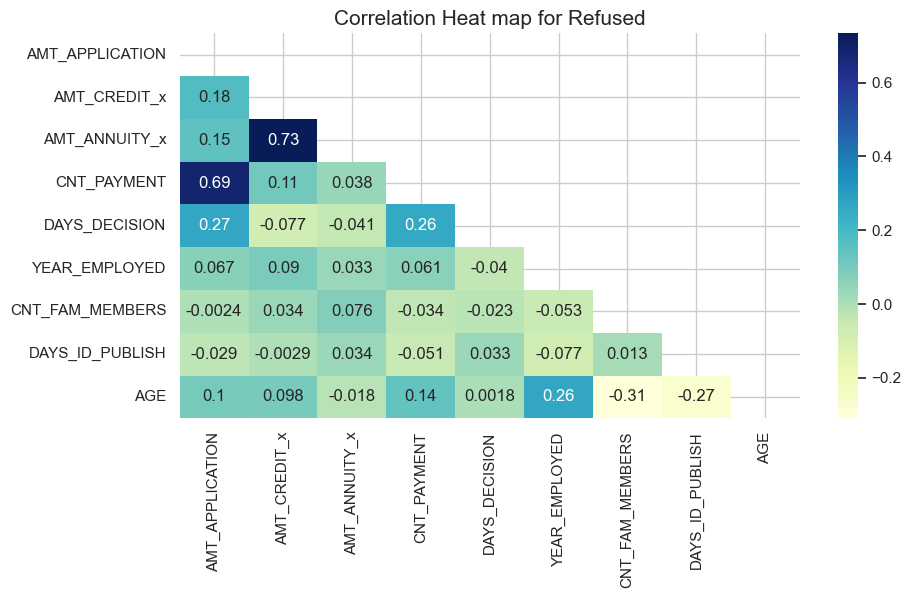

In [529]:
# Correlation Heat map for Refused loans
corr_a = data_refused[corr_cols].corr()
mask_a = np.zeros_like(corr_a)
mask_a[np.triu_indices_from(mask_a)]= True
f, ax = plt.subplots(figsize=(10, 5))
with sns.axes_style('white'):
    ax= sns.heatmap(corr_a, mask=mask_a, cmap="YlGnBu",annot=True)
    plt.title('Correlation Heat map for Refused',fontdict={'fontsize':15})
    plt.show()

Top Correlation in case of Refused loans
1. AMT_ANNUITY vs AMT_CREDIT - 0.73
2. CNT_PAYMENT vs AMT_APPLICATION - 0.69
3. DAYS_DESCISION vs AMT_APPLICATION - 0.27
4. AGE vs YEAR_EMPLOYED - 0.26

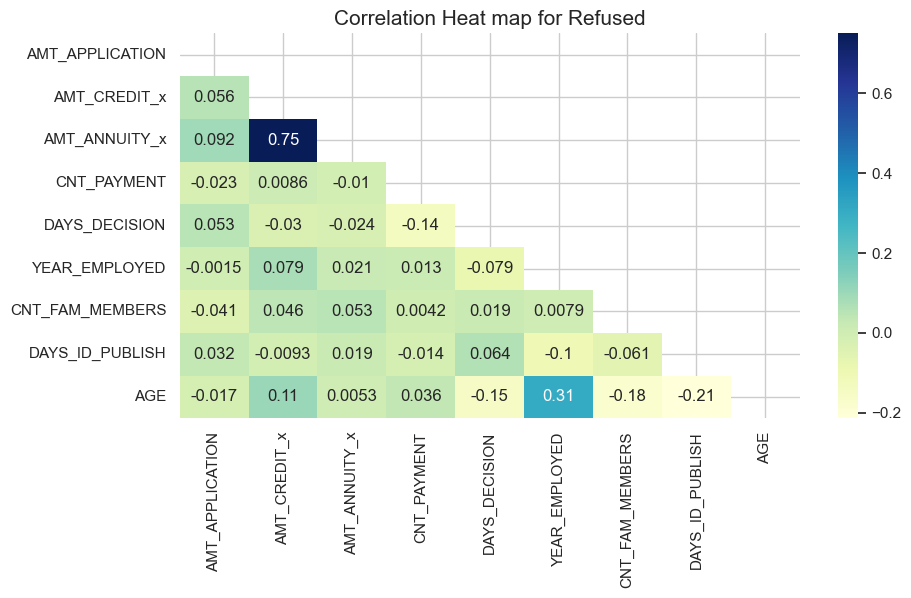

In [530]:
# Correlation Heat map for Unused loans
corr_a = data_unused[corr_cols].corr()
mask_a = np.zeros_like(corr_a)
mask_a[np.triu_indices_from(mask_a)]= True
f, ax = plt.subplots(figsize=(10, 5))
with sns.axes_style('white'):
    ax= sns.heatmap(corr_a, mask=mask_a, cmap="YlGnBu",annot=True)
    plt.title('Correlation Heat map for Refused',fontdict={'fontsize':15})
    plt.show()

Top Correlation in case of Refused loans
1. AMT_ANNUITY vs AMT_CREDIT - 0.75
2. AGE vs YEAR_EMPLOYED - 0.31

In [533]:
# this is the comparison of loan defaulters 
(df_application_data.groupby('OCCUPATION_TYPE')['TARGET'].mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE
Low-skill Laborers       17.158047
Drivers                  11.729736
Waiters/barmen staff     11.204268
Security staff           10.928121
Laborers                 10.816597
Cooking staff            10.600035
Sales staff               9.818111
Cleaning staff            9.769989
Realty agents             8.215297
Secretaries               7.008965
Medicine staff            6.838868
IT staff                  6.837607
Private service staff     6.734694
unknown                   6.660360
Managers                  6.608438
Core staff                6.533746
High skill tech staff     6.391910
HR staff                  6.275304
Accountants               5.150855
Name: TARGET, dtype: float64

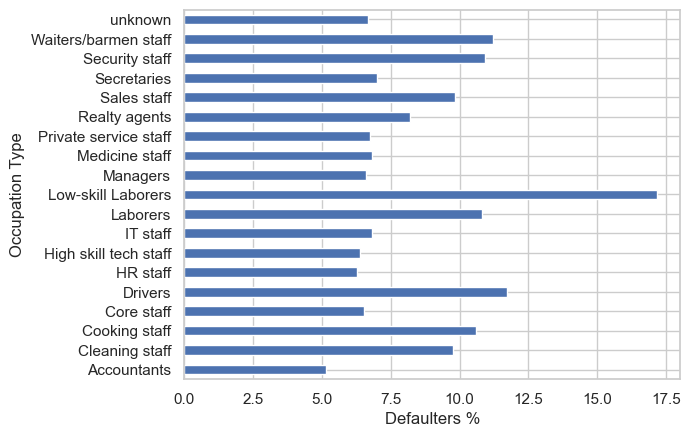

In [534]:
# Plot the graph for target vs Occupation types
(df_application_data.groupby('OCCUPATION_TYPE')['TARGET'].mean()*100).plot.barh()
plt.xlabel('Defaulters %')
plt.ylabel('Occupation Type')
plt.show()

#### OCCUPATION_TYPE v/s % of defaulters 
 - 'Low-Skill Laborers' having the highest rate of defaulting loan
 - 'Accoutants' having the lowest rate of defaulting loan

<Axes: ylabel='OCCUPATION_TYPE'>

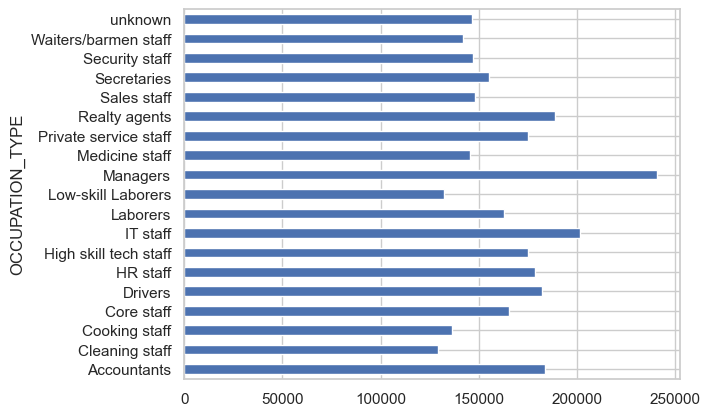

In [535]:
# Let see the income vs occupation type
(df_application_data.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean()).plot.barh()

Now analyzing the data bar chart of Occupation type v/s Target and income v/s occupation Type
 - Even though the Manager has the highest avg salary still their default rate is higher than Accountants

Conclusion

<br>*** Loan providers should target more the education type 'Higher education' and try to avoid Secondary/secondary special, incomplete higher or lower secondary as they face payment difficulties.**

*** Avoid 'Working' clients as they have high percentage of payment difficulties. Rather focus on Commercial associate, pensioner and State servant.**

*** Should fcus on applicants from housing type ‘House/apartment’ Yes as they are having less payment difficulties. **

*** Loan Providers should keep on focusing on Female clients, as they have the low percentage of default rate compared to Male applicants. **

*** Loan Providers should track the occupation type more serously as 'Unknown' type has the highest % of successful loan payment history. If we can reveal the OCCUPATION_TYPE for those class Loan Providers can easily target the group. ** 

*** Loan Providers should focus on the client from age group of 44 to 70 as they will be financial stable and shows less paying difficulties.**

